<a href="https://colab.research.google.com/github/virf96/Analisis_Texto/blob/master/ML_for_text_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas de agrupación y clasificación de documentos

### Procesamiento del Lenguaje Natural

**Pablo Martínez Olmos, Vanessa Gómez Verdejo, Emilio Parrado Hernández**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

La autoorganización de colecciones de documentos y la clasificación de documentos son dos problemas clásicos en NLP en los que vamos a trabajar hoy. En esta sesión vamos a poner en práctica todo lo aprendido en cuanto a extracción de características de textos para abordar estos problemas. 

En primer lugar, revisaremos técnicas básicas de agrupación (*clustering*) para encontrar grupos en un cuerpo de documentos. Tened en cuenta que, una vez hemos aprendido a vectorizar documentos (TF-IDF,BOW,embeddings), **un documento va a venir representado por un vector $\mathbf{x}$ de cierta dimensión**. Este será el input para los distintos algoritmos que vamos a ver hoy.





# 1. K-means clustering

Comenzaremos un repaso de K-means, probablemente la ténica de clustering más utilizada en NLP por sus características de escalabilidad a grandes conjuntos de datos.

## 1.1 Algoritmo K-means
---

Dado un dataset de $\{\mathbf{x}_n\}_{n=1}^N$, una métrica de **distancia** entre cualquier par de puntos $d(\mathbf{x},\mathbf{x}')$ y un número $K$ prefijado de grupos, K-means implementa el siguiente algoritmo iterativo para asignar cada dato a una de las $K$ posibles grupos:

**Inicialización**. Cada grupo $k$, $k=1,\ldots,K$, se caracteriza por un *centroide* que $\mathbf{c}_k$ que inicializa (en la versión de k-means más sencilla) escogiendo aleatoriamente un punto de nuestro dataset. 

Hasta **convergencia** se repiten los siguientes pasos:

- **Paso I: asignación**. Para $n=1,\ldots,N$, el dato $\mathbf{x}_n$ se asigna al grupo cuyo centroide esté más cerca de acuerdo a la métrica de distancia. Esto es, si $A(\mathbf{x}_n)\in\{1,\ldots,K\}$ representa el grupo asignado al dato $\mathbf{x}_n$ entonces

\begin{align}
A(\mathbf{x}_n) = \arg \min_{\{1,\ldots,K\}} d(\mathbf{x}_n,\mathbf{c}_k)
\end{align}

- **Paso II: actualizar centroides**. Dadas las asignaciones de los datos a los grupos, recalculamos el centroide como la media aritmética de los puntos asignados a  cada una de ellas. Para $k=1,\ldots,K$,

\begin{align}
\mathbf{c}_k = \frac{1}{N_k} \sum_{n: A(\mathbf{x}_n)= k} \mathbf{x}_{n},
\end{align}
$~~~~~~$ donde $N_k$ es el número de puntos asignados al grupo $k$.

Si no hay cambios en la asignación de puntos a grupos entre dos iteraciones consecutivas, el algoritmo ha convergido. En caso contrario, volvemos al paso 2.


<img src='http://www.tsc.uc3m.es/~olmos/BBVA/k-mean_good.jpg' width=1000 />


## 1.2 Un ejemplo sintético en dos dimensiones
---

Como es habitual, vamos a mostrar el uso de la librería [KMeans de Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) y su solución con un ejemplo sintético en dos dimensiones.



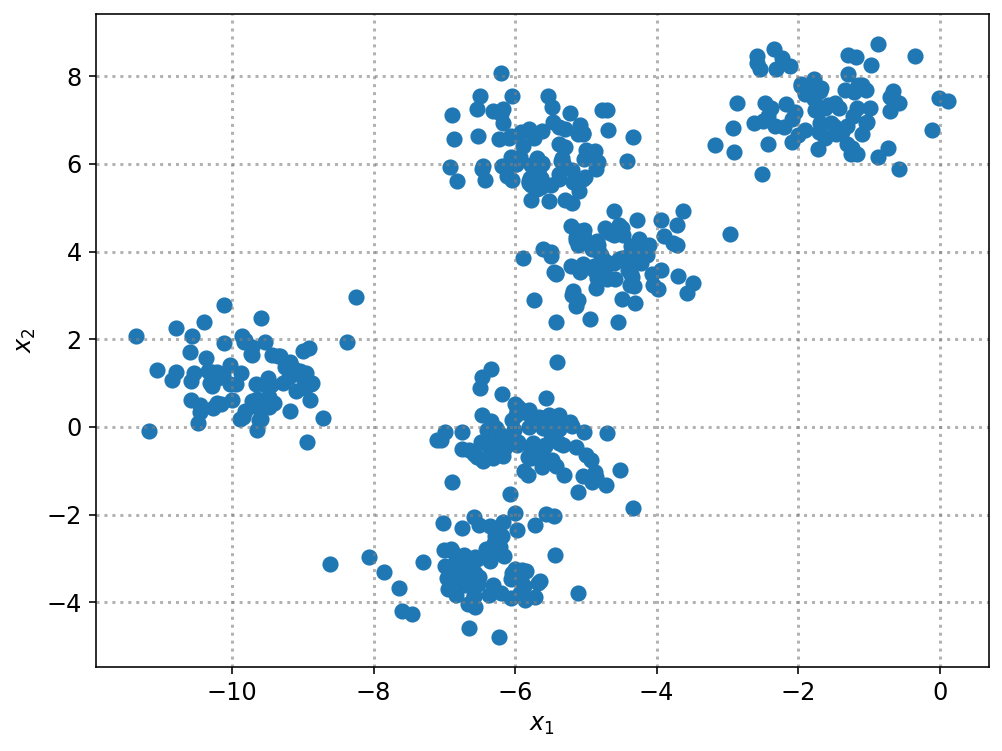

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt

# Configuración de las figuras matplotlib
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 12})

rng = np.random.RandomState(36)

X, y_true = make_blobs(n_samples=500, centers=6,
                       cluster_std=0.6, random_state=22)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# K-means con K=4. Luego hablamos sobre la selección de K
K=4

kmeans = KMeans(n_clusters=K) # Definimos objeto con parámetros por defecto
kmeans.fit(X) # Entrenamos k-means
y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_

In [ ]:
y_kmeans

array([0, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0, 3, 3, 0, 0, 1, 1, 3, 0, 0, 1,
       3, 2, 0, 3, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2,
       2, 0, 0, 1, 2, 3, 2, 1, 2, 0, 2, 2, 3, 2, 1, 0, 2, 2, 0, 3, 2, 0,
       1, 0, 0, 2, 3, 3, 2, 1, 2, 0, 0, 3, 0, 3, 2, 1, 1, 0, 0, 0, 0, 0,
       1, 2, 0, 3, 1, 0, 1, 0, 3, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2,
       3, 0, 0, 1, 0, 1, 3, 1, 1, 1, 1, 3, 0, 3, 3, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 3, 1, 0,
       0, 0, 0, 1, 3, 3, 1, 3, 3, 3, 2, 1, 3, 2, 0, 1, 1, 0, 1, 3, 2, 1,
       2, 0, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1,
       0, 1, 3, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 3, 2, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 3, 2, 3, 0, 1, 1, 0, 0, 0,
       3, 2, 1, 3, 1, 1, 0, 0, 1, 0, 0, 0, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 0, 1, 0, 0, 1, 3, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 0, 0, 3, 3, 1, 1, 2, 1,

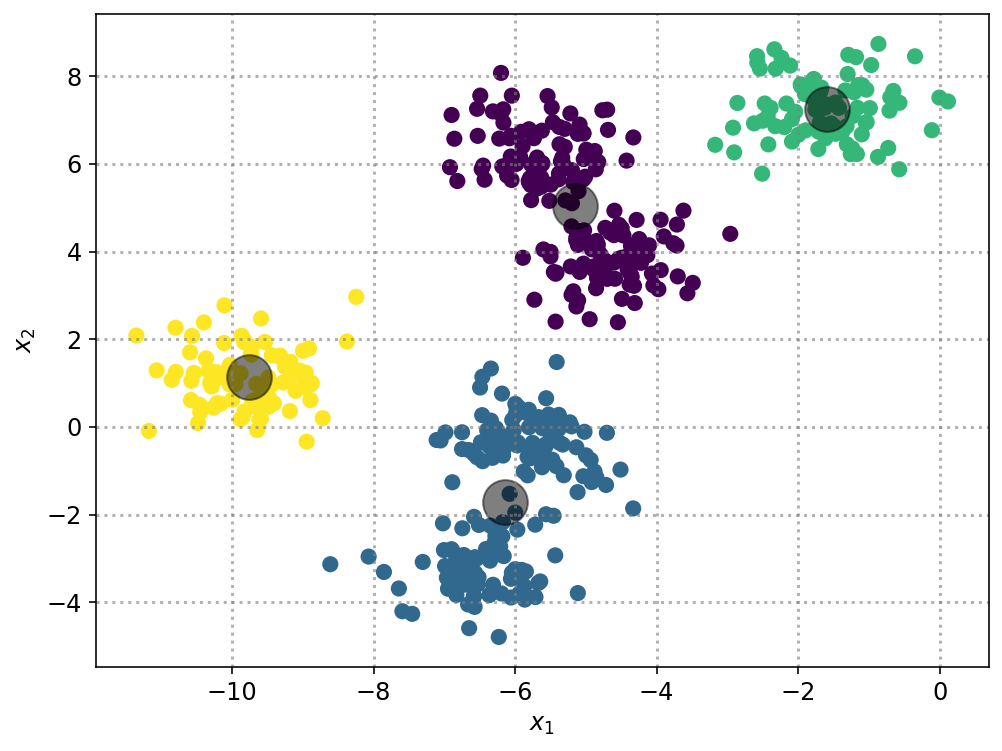

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


## 1.3 Sensibilidad con la inicialización
---

En la práctica, el algoritmo k-means es muy rápido (uno de los algoritmos de agrupamiento más rápidos disponibles), pero su solución no es única (hay muchos mínimos locales). Por eso puede ser útil reiniciarlo varias veces.

Vamos a comprobar en el ejemplo anterior las soluciones con distintas inicializaciones. En las siguientes figuras, mostramos la **inicialización de cada centroide con un triángulo rojo**.


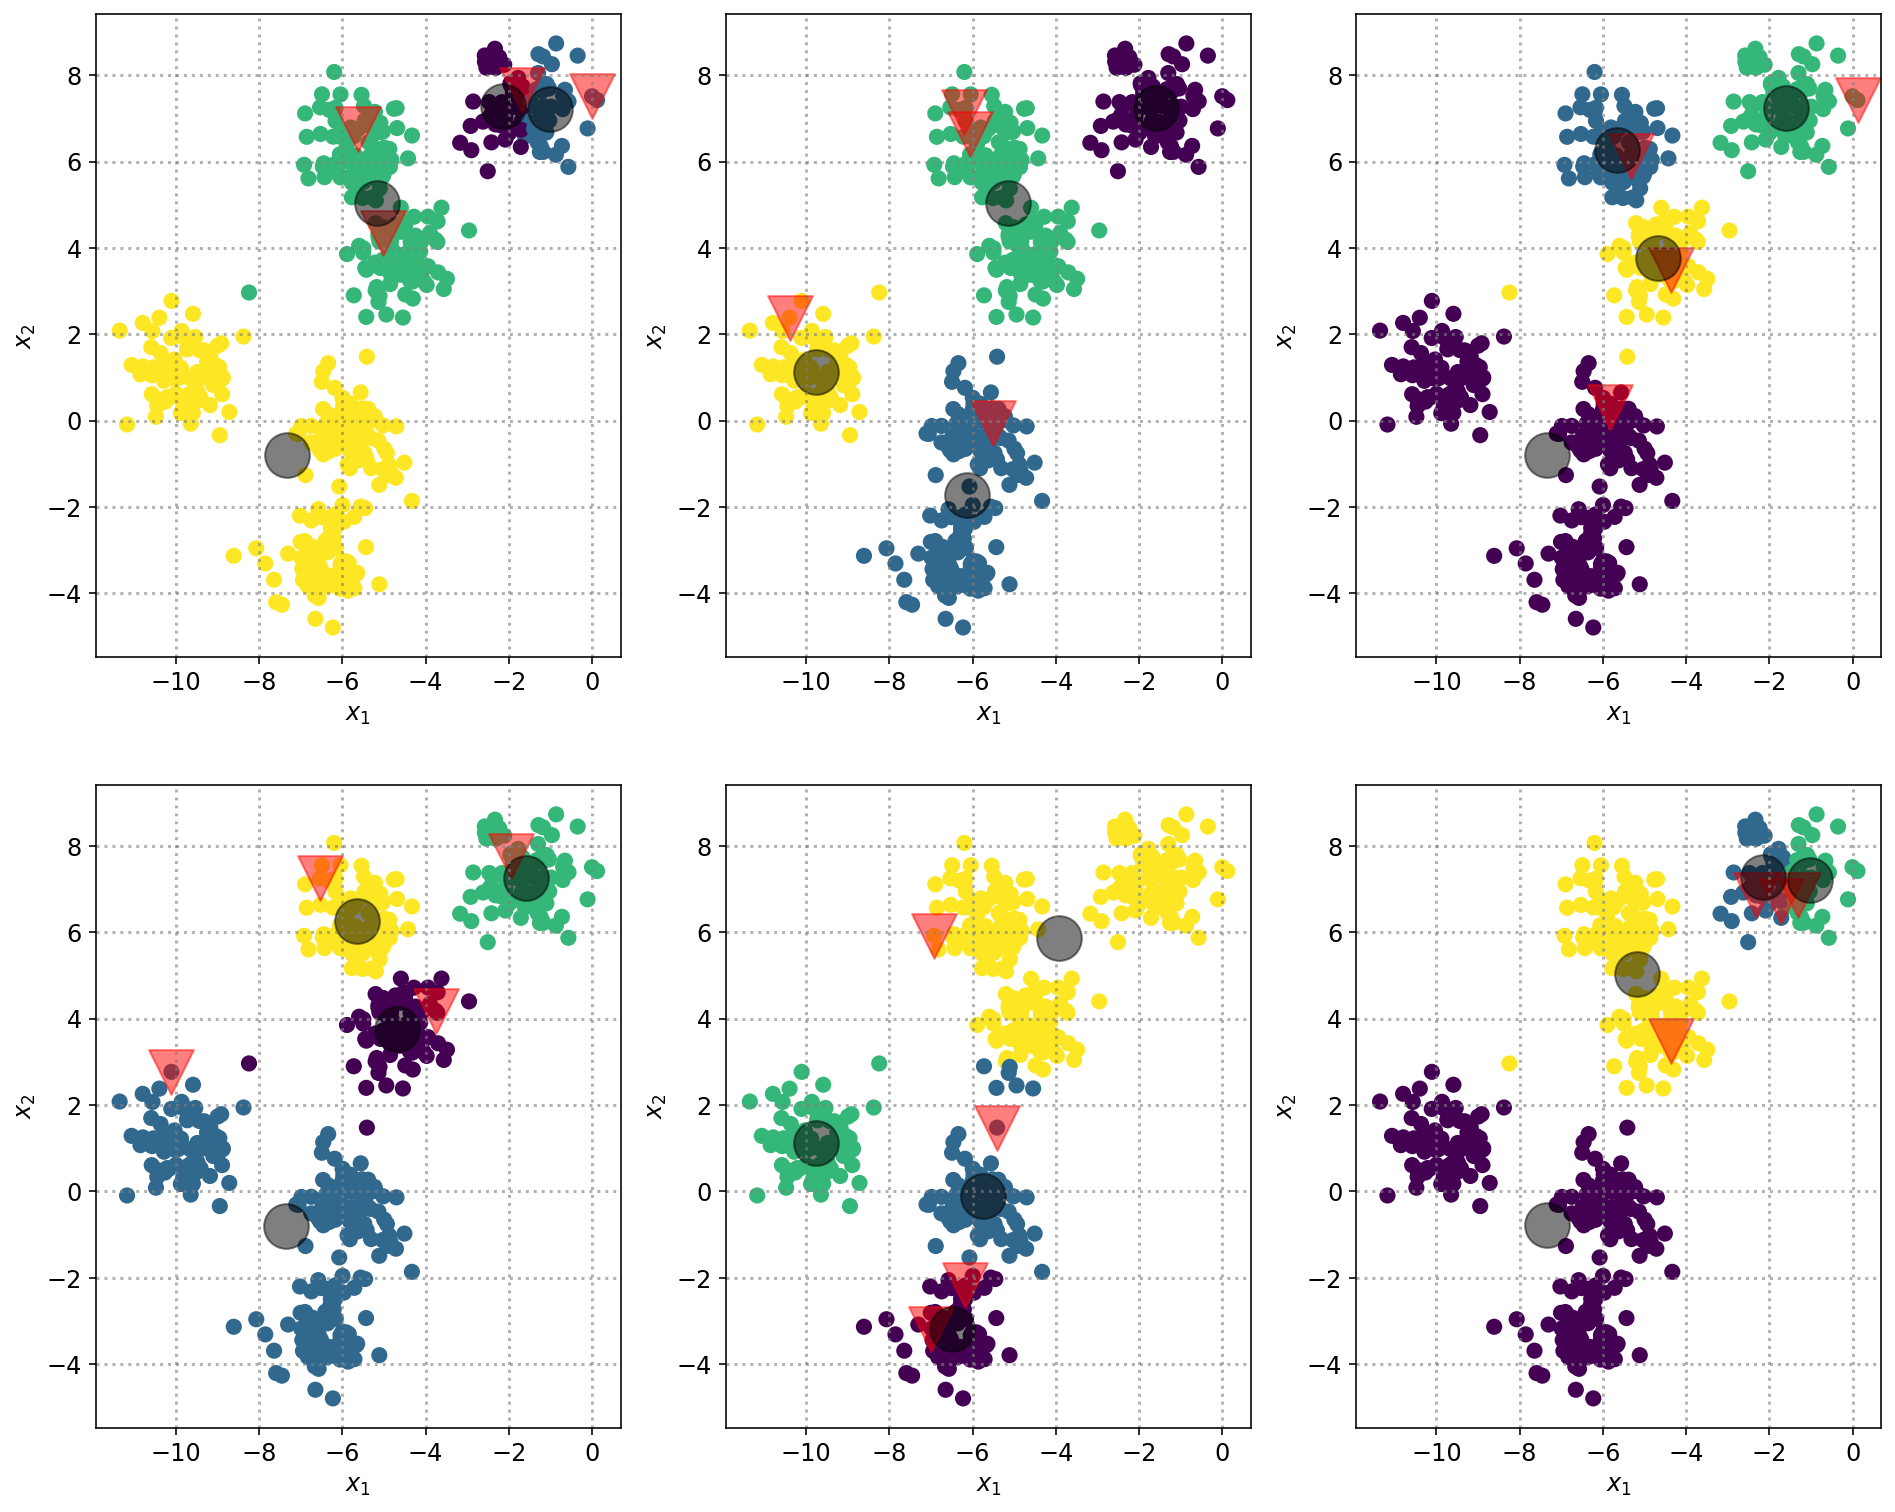

In [ ]:
n_plots_row = 3
n_rows = 2
rs = 45

fig, ax = plt.subplots(nrows=n_rows, ncols=n_plots_row, figsize=(16, 13))

for r in range(n_rows):
    for c in range(n_plots_row):
        
        # Inicialización aleatoria en el dataset
        centers_idx = np.random.permutation(X.shape[0])[:4]
        init_centroids = X[centers_idx,:]
        kmeans = KMeans(n_clusters=K,init=init_centroids,random_state=rs,n_init=1) 
        kmeans.fit(X) # Entrenamos k-means
        y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
        
        centers = kmeans.cluster_centers_
        
        ax[r,c].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        ax[r,c].scatter(init_centroids[:,0], init_centroids[:, 1], c='red', s=500, alpha=0.5,
                        marker="v",label='Inicialización')
        ax[r,c].scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5,label='Centroide k-means')
        ax[r,c].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

        ax[r,c].set_xlabel('$x_1$')
        ax[r,c].set_ylabel('$x_2$')


¿Cómo escoger qué solución de K-means es la más adecuada? Podemos nombrar dos opciones básicas.

1. Si buscamos grupos **interpretables** (por ejemplo agrupar clientes de un determinado servicio bancario), tendremos que mirar con atención los grupos y decidir qué solución de K-means se ajusta de forma más coherente a  los datos y el problema en cuestión. Típicamente, esto lo haría un experto en el problema en sí (no tanto una persona que únicamente sepa de aprendizaje automático).


2. Podemos utilizar la **función de coste de K-means** u otros coeficientes que midan la **consistencia de los grupos encontrados**.




## 1.4 Función de coste en K-means
---

El algoritmo iterativo de $K$-means que hemos presentado anteriormente es una forma de encontrar la solución al siguiente problema

\begin{align}
\min_{\mathbf{c}_1,\ldots,\mathbf{c}_K} \mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K) = \min_{\mathbf{c}_1,\ldots,\mathbf{c}_K} \frac{1}{N} \sum_{k=1}^K \sum_{i: A(\mathbf{x}^{(i)})= k} d(\mathbf{x}^{(i)},\mathbf{c}_k)
\end{align}

donde fijaos que la función de coste $\mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K)$ es la **distancia promedio de cada punto a su correspondiente centroide**. En K-means, pretendemos minimizar esta cantidad. Sin embargo, como hemos comentado esta función de coste tiene en general varios mínimos locales.

Una opción para escoger la solución de K-means es buscar aquella que minimiza $\mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K)$ tras repetir el algoritmo un cierto número de veces. En [K-means con sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) accedemos al valor de $\mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K)$ con el atributo `inertia_` si lo dividimos por el número de datos.


Estudiemos el valor de $L$ en el caso anterior.

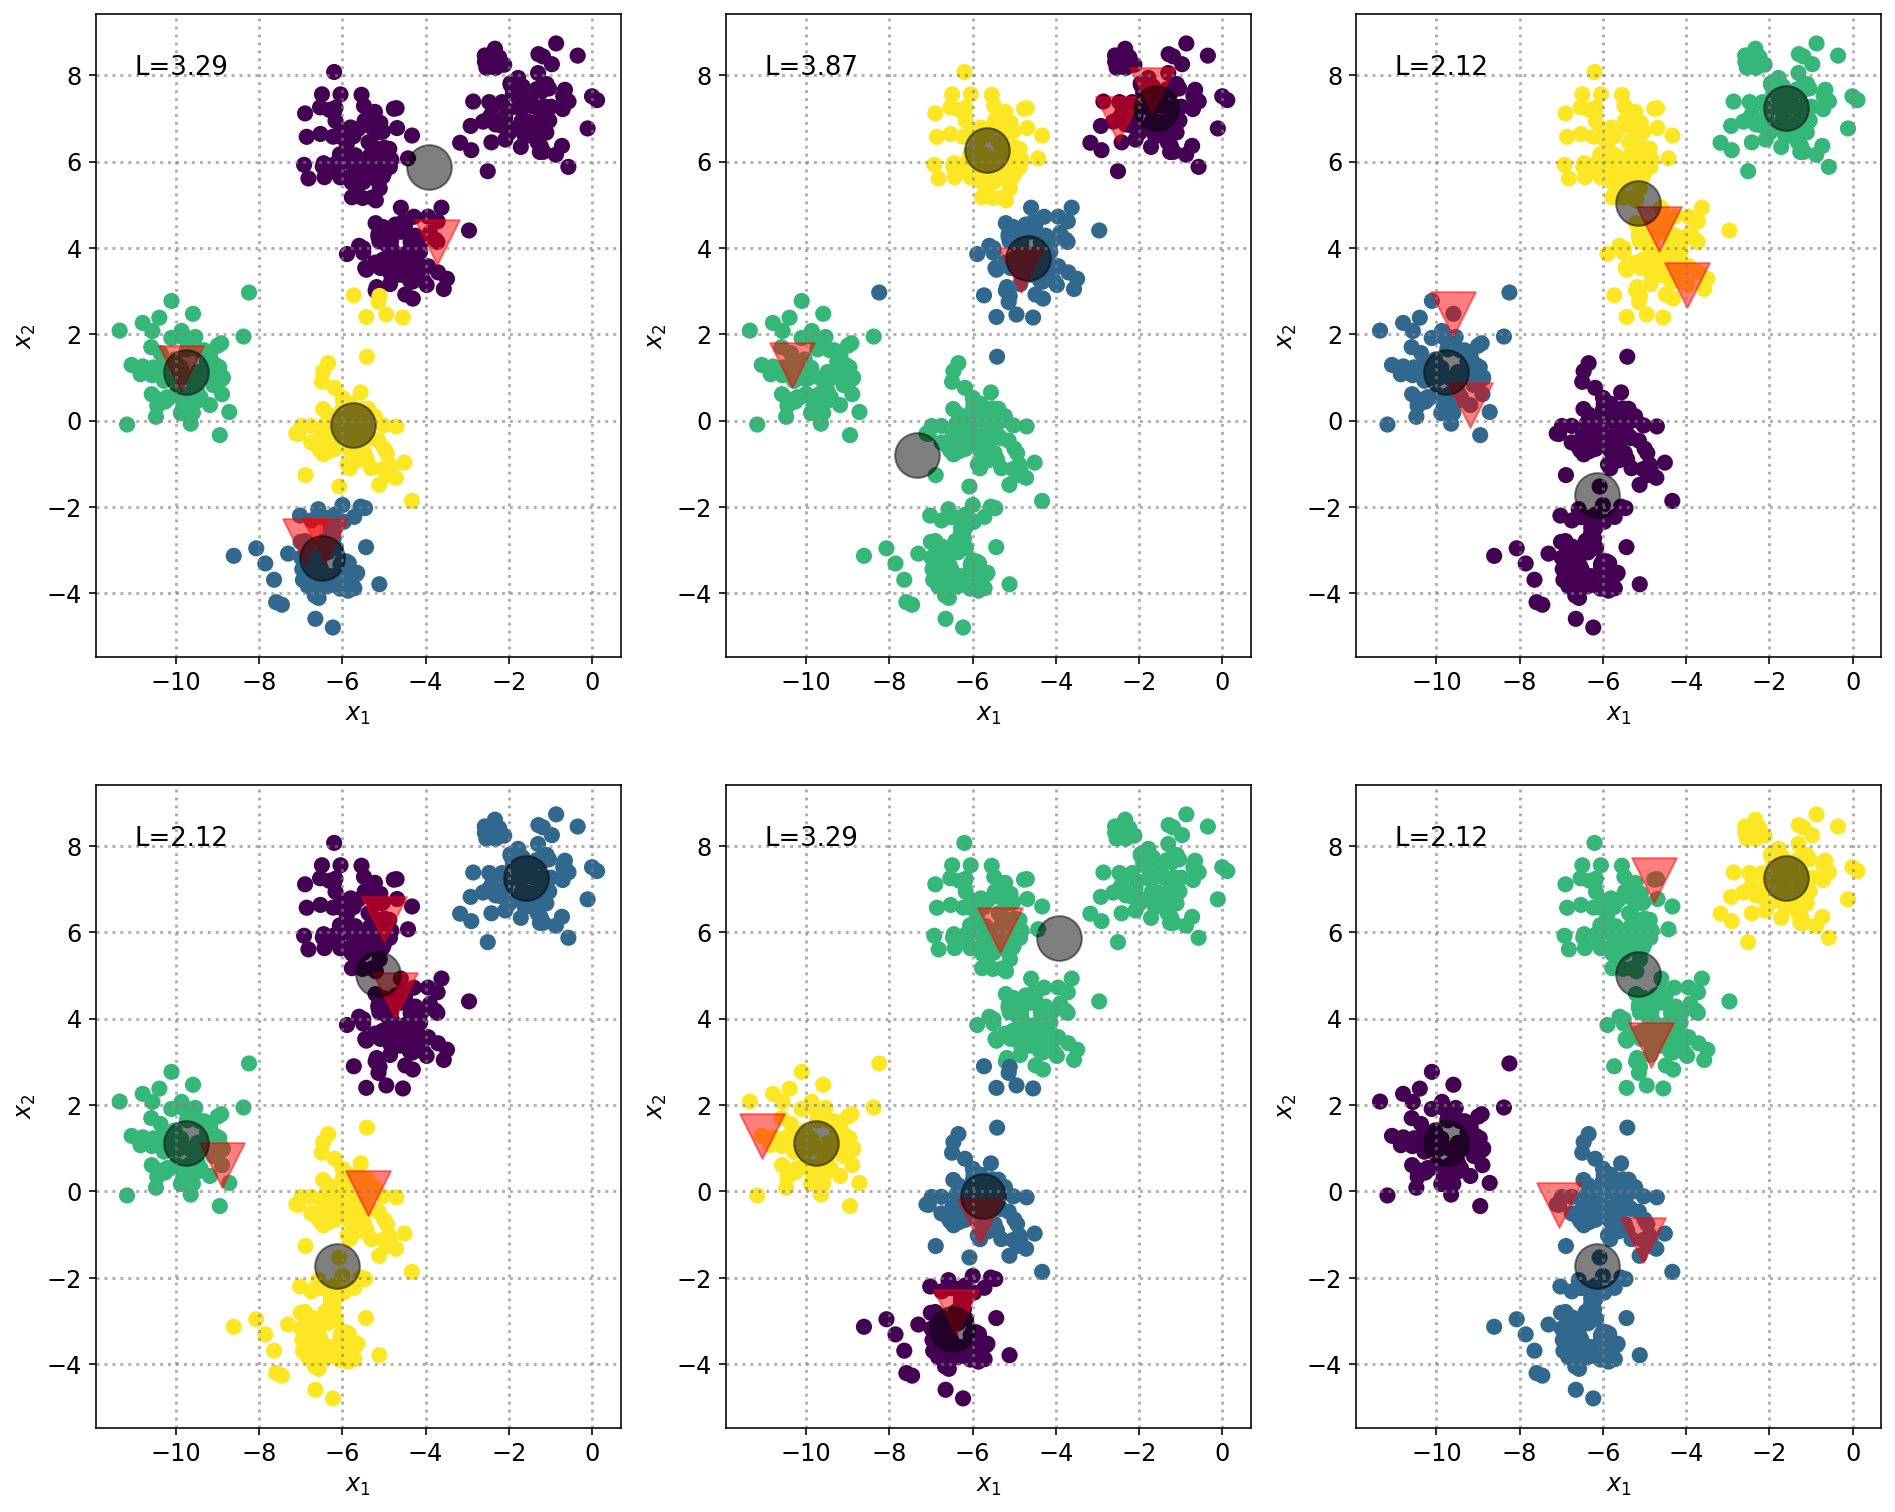

In [ ]:
n_plots_row = 3
n_rows = 2
rs = 45

fig, ax = plt.subplots(nrows=n_rows, ncols=n_plots_row, figsize=(16, 13))

for r in range(n_rows):
    for c in range(n_plots_row):
        
        # Inicialización aleatoria en el dataset
        centers_idx = np.random.permutation(X.shape[0])[:4]
        init_centroids = X[centers_idx,:]
        kmeans = KMeans(n_clusters=K,init=init_centroids,random_state=rs,n_init=1) 
        kmeans.fit(X) # Entrenamos k-means
        y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
        
        centers = kmeans.cluster_centers_
        
        ax[r,c].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        ax[r,c].scatter(init_centroids[:,0], init_centroids[:, 1], c='red', s=500, alpha=0.5,
                        marker="v",label='Inicialización')
        ax[r,c].scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5,label='Centroide k-means')
        ax[r,c].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        ax[r,c].text(-11, 8, 'L={0:.2f}'.format(kmeans.inertia_/X.shape[0]), fontsize=13)
        ax[r,c].set_xlabel('$x_1$')
        ax[r,c].set_ylabel('$x_2$')

Esta selección de la mejor solución de K-means la podemos implementar directamente en Sklearn con el **parámetro de entrada** `n_init`

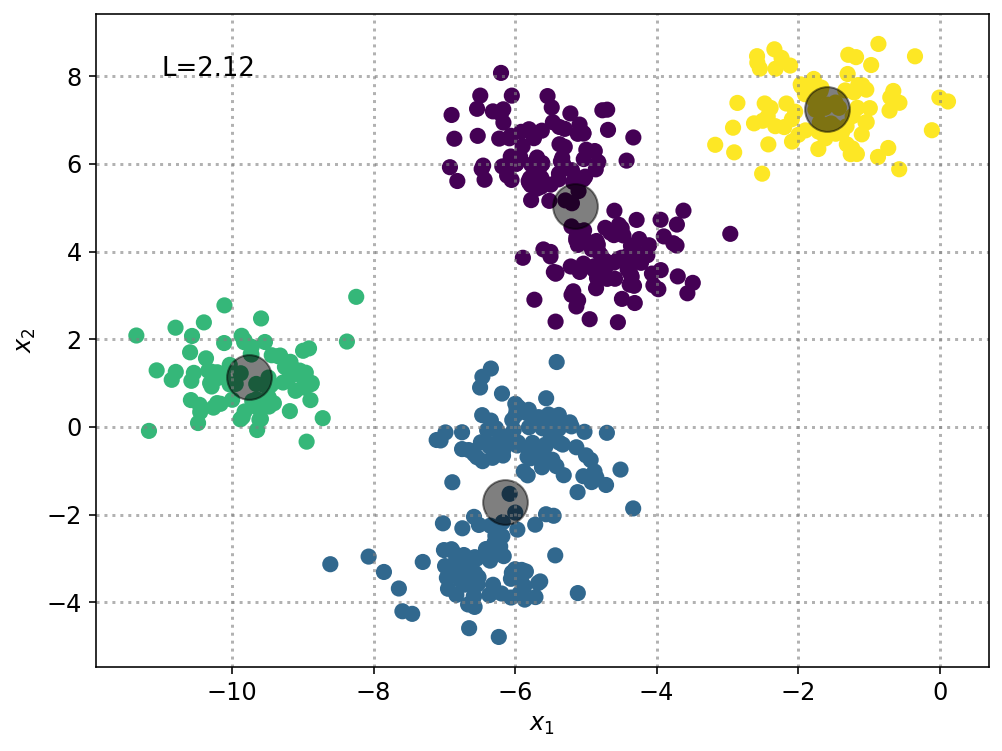

In [ ]:
# K-means con K=4. Luego hablamos sobre la selección de K
K=4

kmeans = KMeans(n_clusters=K,n_init=10) # Definimos objeto con parámetros por defecto
kmeans.fit(X) # Entrenamos k-means
y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.text(-11, 8, 'L={0:.2f}'.format(kmeans.inertia_/X.shape[0]), fontsize=13)
plt.show()

## 1.5 Selección del número $K$ de grupos
---

La elección del número $K$ de grupos puede hacerse con consideraciones similares. 

- Si buscamos interpretabilidad de los grupos, exploraremos la solución para $K=1,2,3, ...$ hasta encontrar qué caso separa los datos de forma interpretable para un experto.

- De nuevo, podemos usar la función de coste $\mathcal{L}(\mathbf{c}_1,\ldots,\mathbf{c}_K)$, pero aquí debemos de tener cuidado. Vamos a representar esta función para distintos valores de $K$ en el caso anterior. 

In [ ]:
K_list = range(2,20)

L = []

for k in K_list:
    
    kmeans = KMeans(n_clusters=k,n_init = 10) # Para cada valor de $K$ lanzamos 10 veces K-means
    kmeans.fit(X)
    L.append((kmeans.inertia_)/(X.shape[0]))
    
# Solución para el último valor de K

y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_

Text(0.5, 1.0, 'K-means para K=19')

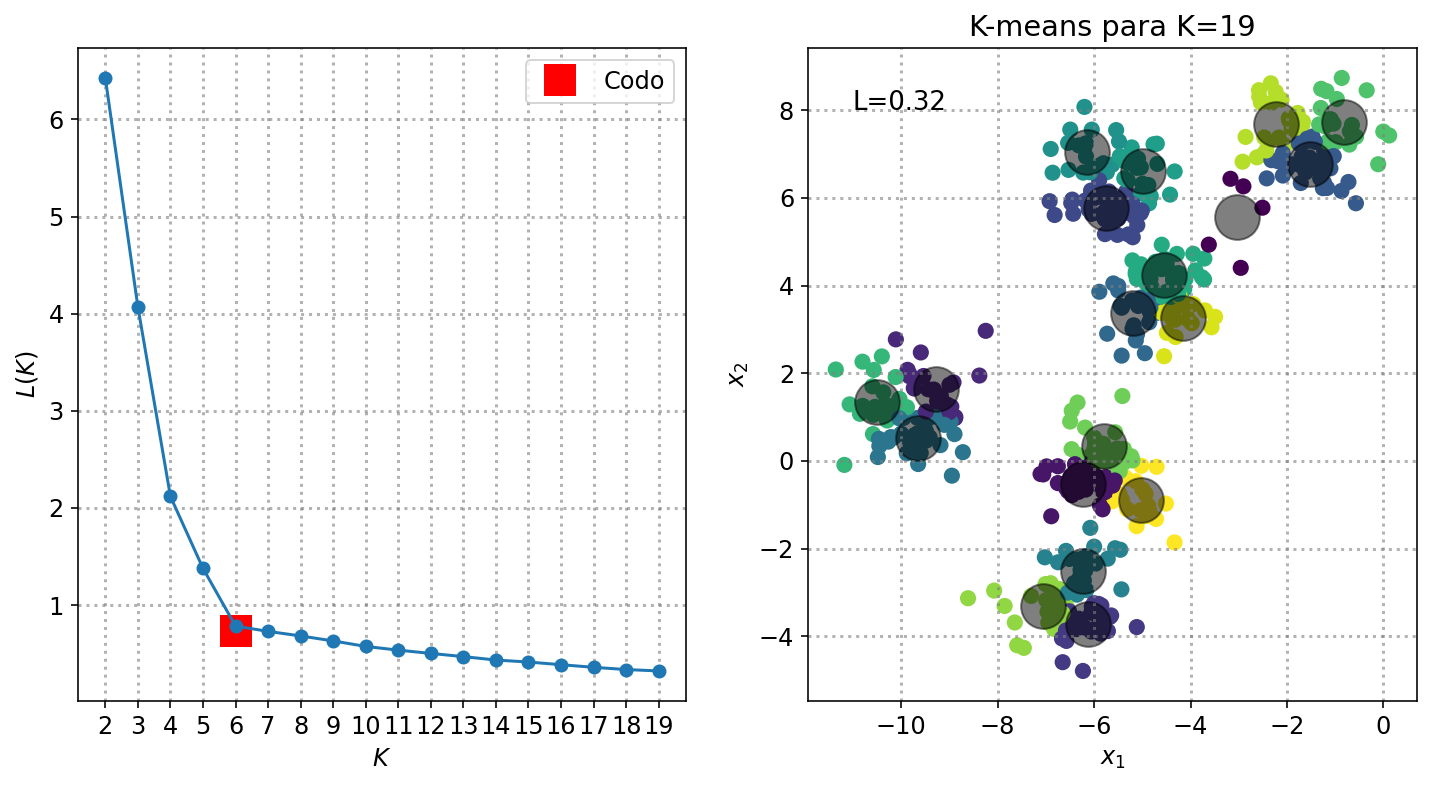

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(6,L[5],'rs',ms=15,label='Codo')
ax[0].plot(K_list,L,'-o')
ax[0].legend()

ax[0].set_xlabel('$K$')
ax[0].set_ylabel('$L(K)$')
ax[0].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax[0].set_xticks(K_list);

ax[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

ax[1].scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

ax[1].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].text(-11, 8, 'L={0:.2f}'.format(kmeans.inertia_/X.shape[0]), fontsize=13)
ax[1].set_title('K-means para K={0:d}'.format(K_list[-1]))



Fijaos que $L(K)$ es una función monotona decreciente con $K$. De hecho, para $K=N$ tendremos un grupo por punto y por tanto haremos $L(K=N)=0$. Esto es un signo claro de **sobreajuste**. En general, dado $L(K)$ buscaremos aquel/aquellos valores de $K$ a partir de los cuales $L(K)$ desciende más lentamente, esto se denomina el **codo de la curva**. En el caso anterior coincide con $K=6$ el número de grupos que habíamos especificado al generar el dataset.

## 1.6 Coeficiente de silueta (silhouette score)
---

De forma alternativa a estudiar $L(K)$ para la selección del número $K$ de grupos, podemos utilizar el denominado coeficiente de silueta ([silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering))). Este valor es una medida de cuán similar es un objeto a su propio cúmulo (cohesión) en comparación con otros cúmulos (separación).

Para cada punto $\mathbf{x}_n$, este coeficiente se calcula del siguiente modo

$$ s(\mathbf{x}_n) = \frac{b(\mathbf{x}_n)-a(\mathbf{x}_n)}{\max\Big\{b(\mathbf{x}_n),a(\mathbf{x}_n)\Big\}}$$

donde 

- para calcular $b(\mathbf{x}_n)$, calculamos el promedio de distancia de $\mathbf{x}_n$ a todos los puntos de cada grupo al que $\mathbf{x}_n$ **no pertenece**. $b(\mathbf{x}_n)$ es el mínimo entre esta distancia promedio por grupo. Por tanto, si $\mathbf{x}_n$ está en el grupo $i$

$$b(\mathbf{x}_n) = \min_{k\neq i} \frac{1}{N_k} \sum_{j: A(\mathbf{x}_j)=k} d(\mathbf{x}_n,\mathbf{x}_j)$$

- $a(\mathbf{x}_n)$ es la distancia promedio de $\mathbf{x}_n$ a todos los puntos de su grupo

$$a(\mathbf{x}_n) = \frac{1}{N_i-1} \sum_{j: A(\mathbf{x}_j)=i,j\neq n} d(\mathbf{x}_n,\mathbf{x}_j)$$


El valor del coeficiente de silueta está entre [-1, 1]. Una puntuación de 1 implica que el dato está cohesionado dentro del grupo al que pertenece y está lejos de los otros grupos. El peor valor es -1. Los valores cercanos a 0 denotan grupos superpuestos.

Con [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) podemos obtener el coeficiente promedio para todos los puntos.

Dibujemos el coeficiente silueta para distintos valores de $K$.

In [ ]:
from sklearn.metrics import silhouette_score

K_list = range(2,20)

L = []
SC = []

for k in K_list:
    
    kmeans = KMeans(n_clusters=k,n_init = 10) # Para cada valor de $K$ lanzamos 10 veces K-means
    kmeans.fit(X)
    L.append((kmeans.inertia_)/(X.shape[0]))
    y_kmeans = kmeans.predict(X) # Obtenemos el identificador del grupo para cada dato
    SC.append(silhouette_score(X,y_kmeans))
    

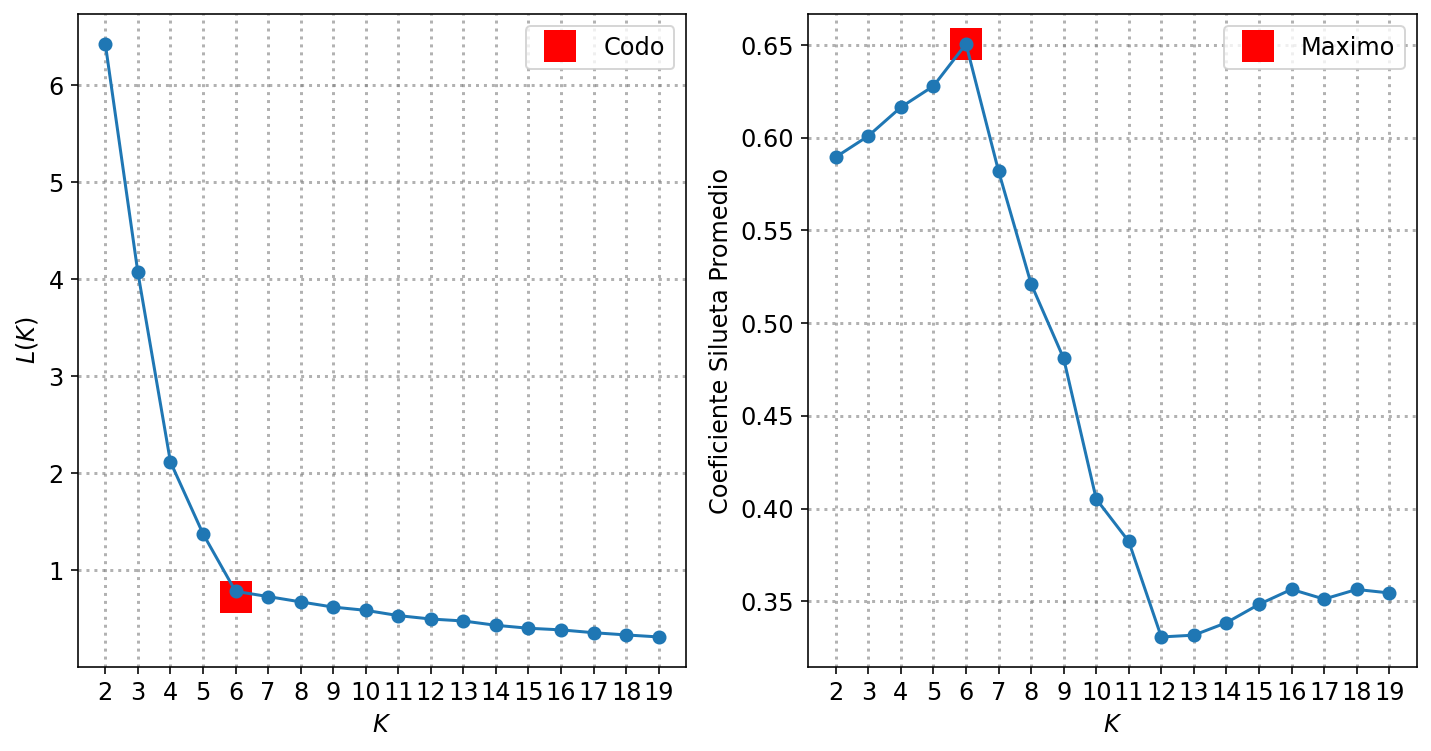

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(6,L[5],'rs',ms=15,label='Codo')
ax[0].plot(K_list,L,'-o')
ax[0].legend()
ax[0].set_xticks(K_list);

ax[0].set_xlabel('$K$')
ax[0].set_ylabel('$L(K)$')
ax[0].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

#ax[1].plot(6,L[5],'rs',ms=15,label='Codo')
ax[1].plot(K_list[np.argmax(SC)],np.max(SC),'rs',ms=15,label='Maximo')
ax[1].plot(K_list,SC,'-o')
ax[1].legend()

ax[1].set_xlabel('$K$')
ax[1].set_ylabel('Coeficiente Silueta Promedio')
ax[1].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax[1].set_xticks(K_list);


# 2. Caracterización de grupos en una base de datos de reclamaciones de clientes en productos/servicios financieros

Pongamos en marcha la maquinaria anterior en la siguiente [base de datos](https://catalog.data.gov/dataset/consumer-complaint-database) publicada por el *Bureau of Consumer Financial Protection* (BCFP), agencial federal de EEUU:

> The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to  companies for response. Complaints are published after the company responds, confirming a commercial relationship with the  consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. 

Podemos cargar la base de datos completa del siguiente modo:

```python
df = pd.read_csv('https://files.consumerfinance.gov/ccdb/complaints.csv.zip', compression='zip', sep=',')
```

Pero es bastante pesada (1.2 Gb). Vamos a cargar un pequeño extracto de la misma, con unos 20.000 registros ...

In [ ]:
import pandas as pd

df = pd.read_csv('http://www.tsc.uc3m.es/~olmos/BBVA/complaints_extracto.csv', sep=',')

# En local
#df = pd.read_csv('complaints_extracto.csv')

In [ ]:
df

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,1050152,2018-02-11,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I disputed with this company back in XXXX the ...,NaN,"EQUIFAX, INC.",MI,482XX,NaN,Consent provided,Web,2018-02-11,Closed with explanation,Yes,NaN,2811182
1,138991,2019-04-18,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",PR,00987,NaN,Consent not provided,Web,2019-04-18,Closed with non-monetary relief,Yes,NaN,3216620
2,1128029,2014-03-01,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,Ocwen Financial Corporation,CA,91601,NaN,NaN,Web,2014-02-28,Closed with explanation,Yes,No,738615
3,54959,2019-07-08,Debt collection,Credit card debt,Communication tactics,Frequent or repeated calls,NaN,NaN,Radius Global Solutions LLC,FL,33756,NaN,Consent not provided,Web,2019-07-08,Closed with explanation,Yes,NaN,3298990
4,2007823,2018-11-18,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,XXXX Details Account # XXXX A payment was sent...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,WI,NaN,NaN,Consent provided,Web,2018-11-18,Closed with non-monetary relief,Yes,NaN,3077718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20555,1302359,2016-09-09,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,92867,NaN,Consent not provided,Web,2016-09-09,Closed with explanation,Yes,No,2104196
20556,604734,2021-01-13,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,"LAKEVIEW LOAN SERVICING, LLC",NY,130XX,NaN,Consent not provided,Web,2021-01-13,Closed with explanation,Yes,NaN,4065840
20557,1627344,2013-07-29,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",SC,29072,NaN,NaN,Web,2013-07-29,Closed with explanation,Yes,Yes,479541
20558,1183427,2015-08-14,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,Company chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76209,NaN,Consent not provided,Web,2015-08-23,Closed with explanation,Yes,No,1518765


Vamos a centrarnos en los campos `Sub-product`, `Issue` y `Consumer complaint narrative`:

> **Ejercicio**: extraiga en un dataframe estos cuatro campos y borre todos los registros con algún campo vacío (`Nan`)

In [ ]:
df_red = df[['Issue','Consumer complaint narrative']].copy()
df_red.dropna(inplace=True)

df_red

,Issue,Consumer complaint narrative
0,Problem with a credit reporting company's inve...,I disputed with this company back in XXXX the ...
4,Incorrect information on your report,XXXX Details Account # XXXX A payment was sent...
6,Managing an account,This is more of a general complaint because it...
7,Incorrect information on your report,MY WIFE AND I HAVE BEEN A VICTIM OF IDENTITY T...
14,Unable to get your credit report or credit score,REQUEST FOR FREE ANNUAL CREDIT REPORT!!! \nI b...
...,...,...
20539,Took or threatened to take negative or legal a...,Pressler and Pressler a ttorneys for XXXX ...
20542,Getting the loan,got a call from lendingpoint they promise to g...
20548,Incorrect information on your report,XXXX XXXX XXXX XXXX XXXX Account XXXX Informa...
20550,Attempts to collect debt not owed,I previously submitted a complaint on XX/XX/XX...


## 2.1 Caracterización del campo `Issue`

> **Ejercicio** Estudie cuantos valores toma dicho campo usando la función `.unique()` de pandas. Imprimalos en orden alfabético, para ello puede usar la función `sorted()` aplicada a una lsita de strings ...

In [ ]:
list_issues = list(df_red['Issue'].unique())

list_issues = sorted(list_issues)

print(f"Hay {len(list_issues)} elementos distintos en el campo Issues")

Hay 126 elementos distintos en el campo Issues


In [ ]:
list_issues

['APR or interest rate',
 'Account opening, closing, or management',
 'Account terms and changes',
 'Adding money',
 'Advertising',
 'Advertising and marketing',
 'Advertising and marketing, including promotional offers',
 'Application processing delay',
 'Application, originator, mortgage broker',
 'Applying for a mortgage or refinancing an existing mortgage',
 'Arbitration',
 'Attempts to collect debt not owed',
 'Balance transfer',
 'Bankruptcy',
 'Billing disputes',
 'Billing statement',
 "Can't contact lender",
 "Can't contact lender or servicer",
 "Can't repay my loan",
 "Can't stop charges to bank account",
 "Can't stop withdrawals from your bank account",
 'Cash advance',
 "Charged fees or interest I didn't expect",
 "Charged fees or interest you didn't expect",
 'Closing an account',
 'Closing on a mortgage',
 'Closing your account',
 'Closing/Cancelling account',
 'Communication tactics',
 'Confusing or misleading advertising or marketing',
 'Confusing or missing disclosures'

Ciertamente, una persona podría compactar "a mano" los valores anteriores en unos pocos grupos, ya que estan muy correlados. En lugar de eso, vamos a usar K-means para implementar dicha tarea. Utilizaremos word embeddigns. Esto tiene la ventaja de **no predefinir un diccionario** (como haríamos en TF-IDF), de tal manera que si al ampliar la base de datos aparece un campo nuevo en `Issue` podríamos agruparlo sin re-definir nuestro agrupamiento.

> **Ejercicio**: Codifique el campo `Issues` usando la media de los word embeddings de las palabras del texto, una vez se han filtrado stopping words y signos de puntuación. Exporte dicha codificación a un numpy array `W`, de dimensiones (# documentos x dim. del embedding)
>
>Se recomienda usar un modelo de lenguaje en inglés de spaCy. Para acelerar el procesado puede desabilitar los siguientes procesos del pipeline
>
>``` python
>
>nlp = spacy.load("en_core_web_md")
>
>list_processes = ["parser","ner"]
>
>for l in list_processes:
>    nlp.disable_pipe(l) 
>    
>nlp.add_pipe('sentencizer')
>
>```
>
> En la última línea incluímos el segmentador de oraciones que utilizaremos más adelante.



In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

In [ ]:
list_processes = ["parser","ner"]

for l in list_processes:
    nlp.disable_pipe(l) 
    
nlp.add_pipe('sentencizer')

In [ ]:
issues = [nlp(c) for c in df_red['Issue']]

def normalize(doc):
    
    return [w for w in doc if not w.is_stop and w.has_vector and not w.is_punct]

# eliminamos stopping words, puntuaciones y tokens sin word embedding
norm_issues = [normalize(c) for c in issues]

# Pasamos a modo texto (como hacemos media de WE NO HACE FALTA LEMATIZAR!)
norm_issues_text = [[w.text.lower() for w in c] for c in norm_issues]

# Volvemos a crear una lista de objetos spacy.Doc y extraemos la media de los word embeddings ...

W = np.array([c.vector for c in [nlp(' '.join(w)) for w in norm_issues_text]])

> **Ejercicio:** Implemente un K-means para agrupar el campo `Issues`. Estudie la función de coste de K-means y el coeficiente de silueta para distintos valores del número de grupos, entre 5 y 25. Para acelerar el procesado, puede utilizar la función [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) en la que solo un pequeño grupo de datos de tamaño `batch-size` se utiliza para re-calcular los centroides de cada iteración. 
>
>**Importante:** K-means en Sklearn utiliza *distancia euclídea*, no distancia coseno. Para solventar este problema, normalice la matriz `W` **por filas**, de tal manera que cada dato está representado por un vector de norma 1 y, por tanto, distancia euclídea y coseno sean equivalentes:
>
> Cuando dos vectores $x$ e $y$ están normalizados ($||x||^2 = x^Tx = 1$), sus distancias euclídeas 
> $||x-y||^2$  y coseno $d(x,y)$ están relacionas por la siguiente igualdad:
> 
> $$||x-y||^2 = x^Tx + y^Ty - 2 x^Ty = 2  (1 - x^Ty) = 2  d(x,y)$$
> En este caso, usar la distancia euclídea nos va a dar los mismos resultados que la distancia coseno.
>

In [ ]:
norms = np.linalg.norm(W,axis=1)

norms[norms<=1e-6] = 1e-6

W_ = W/norms.reshape([-1,1])

In [ ]:
from sklearn.cluster import KMeans,MiniBatchKMeans

K_list = range(5,25)

L = []
SC = []
MU = []
knns = {}

for k in K_list:
    
    kmeans = MiniBatchKMeans(n_clusters=k,n_init = 10,batch_size=100) # Para cada valor de $K$ lanzamos 10 veces K-means
    kmeans.fit(W_)
    L.append((kmeans.inertia_)/(W_.shape[0]))
    y_kmeans = kmeans.predict(W_) # Obtenemos el identificador del grupo para cada dato
    SC.append(silhouette_score(W_,y_kmeans))
    
    knns[k] = kmeans

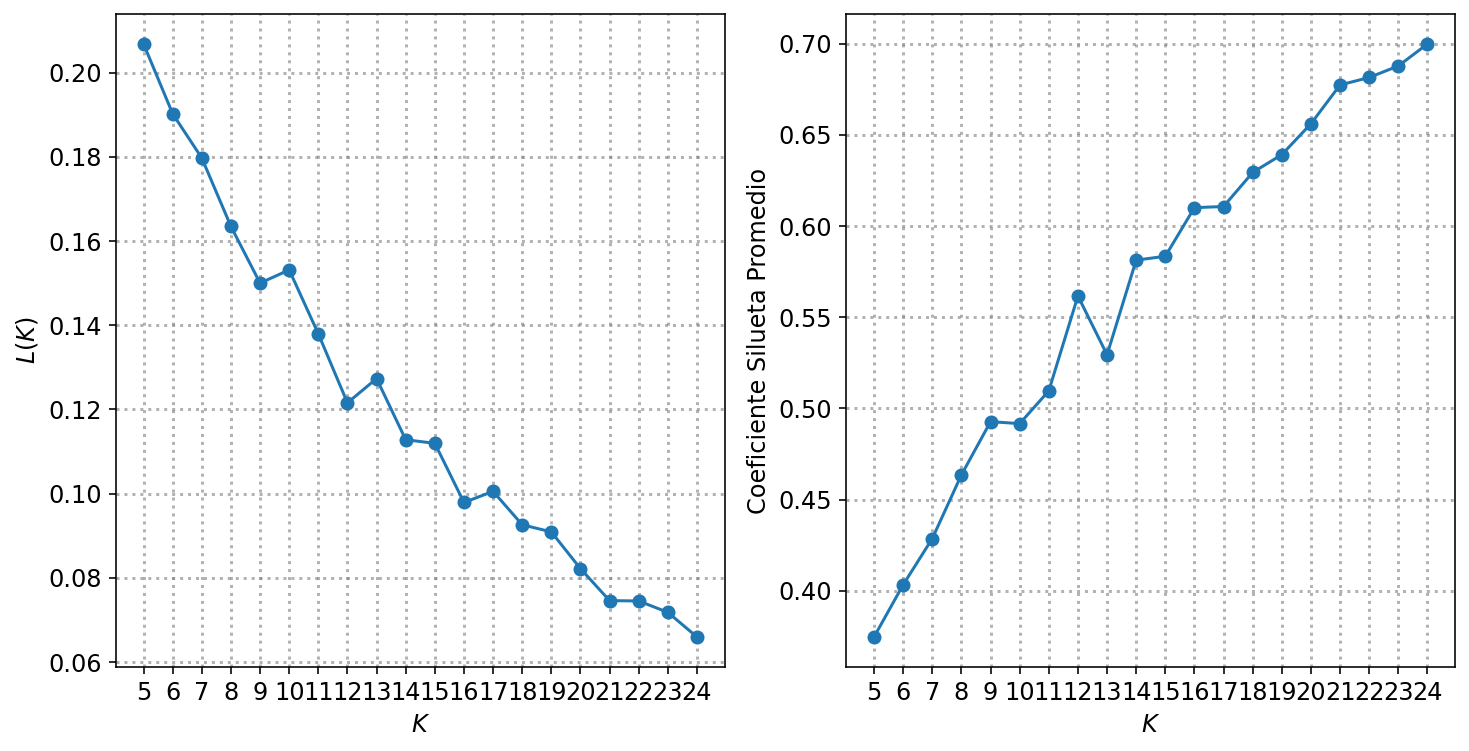

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(K_list,L,'-o')
ax[0].set_xticks(K_list);

ax[0].set_xlabel('$K$')
ax[0].set_ylabel('$L(K)$')
ax[0].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

ax[1].plot(K_list,SC,'-o')
ax[1].set_xlabel('$K$')
ax[1].set_ylabel('Coeficiente Silueta Promedio')
ax[1].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax[1].set_xticks(K_list);

Podemos ver cómo ambas métricas mejoran de forma monotónica con $K$, lo que sugiere que de algún modo los grupos son separables y que a medida que sub-dividimos estos grupos son consistentes. Para no trabajar con un número poco manejable/interpretable, vamos a explorar la solución con $K=10$ ... 

In [ ]:
K = 10

group_issue_per_data = knns[K].predict(W_)

idx_per_group = [np.where(group_issue_per_data==k)[0] for k in range(K)]

len_per_group = [l.shape[0] for l in idx_per_group]

In [ ]:
print(f"Los datos por grupo son {len_per_group}")

Los datos por grupo son [1669, 1851, 822, 615, 168, 293, 630, 483, 142, 279]


Imprimamos los elementos únicos en los grupos:

In [ ]:
etiquetas_issues = []

for k in range(K):
    
    print(f"Los elementos únicos del grupo {k} son:\n")
    
    print(df_red.iloc[idx_per_group[k]]['Issue'].unique())
    
    # Vamos a usar como etiqueta del grupo el primer elemento
    
    etiquetas_issues.append(df_red.iloc[idx_per_group[k]]['Issue'].unique()[0])
    
    print('\n')

Los elementos únicos del grupo 0 son:

["Problem with a credit reporting company's investigation into an existing problem"
 'Unable to get your credit report or credit score' 'Transaction issue'
 'Problem caused by your funds being low'
 'Problem with a purchase shown on your statement'
 "Credit reporting company's investigation" 'Billing disputes'
 'Problem with fraud alerts or security freezes'
 'Customer service / Customer relations'
 'Took or threatened to take negative or legal action'
 'Credit monitoring or identity protection' 'Advertising'
 'Confusing or misleading advertising or marketing'
 'Other features, terms, or problems' 'Fraud or scam'
 'Unauthorized transactions or other transaction problem'
 'Problems when you are unable to pay'
 'Unable to get credit report/credit score' 'Other transaction problem'
 'Problem with a lender or other company charging your account'
 'Advertising and marketing, including promotional offers'
 'Other service problem' 'Problems caused by my 

A pesar de que las métricas de clustering mejoran si aumentamos el número de grupos, podemos comprobar cómo la mayoría de los grupos con $K=10$ son coherentes e interpretables. Algún grupo más diverso podría dividirse. Por ahora, utilizaremos esta solución. 

## 2.2. Agrupación del campo Consumer complaint narrative

Lo primero, vamos a hacernos una idea de la longitud de dicho campo, ya que sabemos que los métodos estudiados para representar textos son sobre todo efectivos para textos cortos.

> **Ejercicio** Dibuje el histograma del número de palabras/oraciones por entrada del campo `Consumer complaint narrative`. 

In [ ]:
complaints = [nlp(c) for c in df_red['Consumer complaint narrative']]


In [ ]:
n_words = [len(c) for c in complaints]

n_sentences = [len(list(c.sents)) for c in complaints]

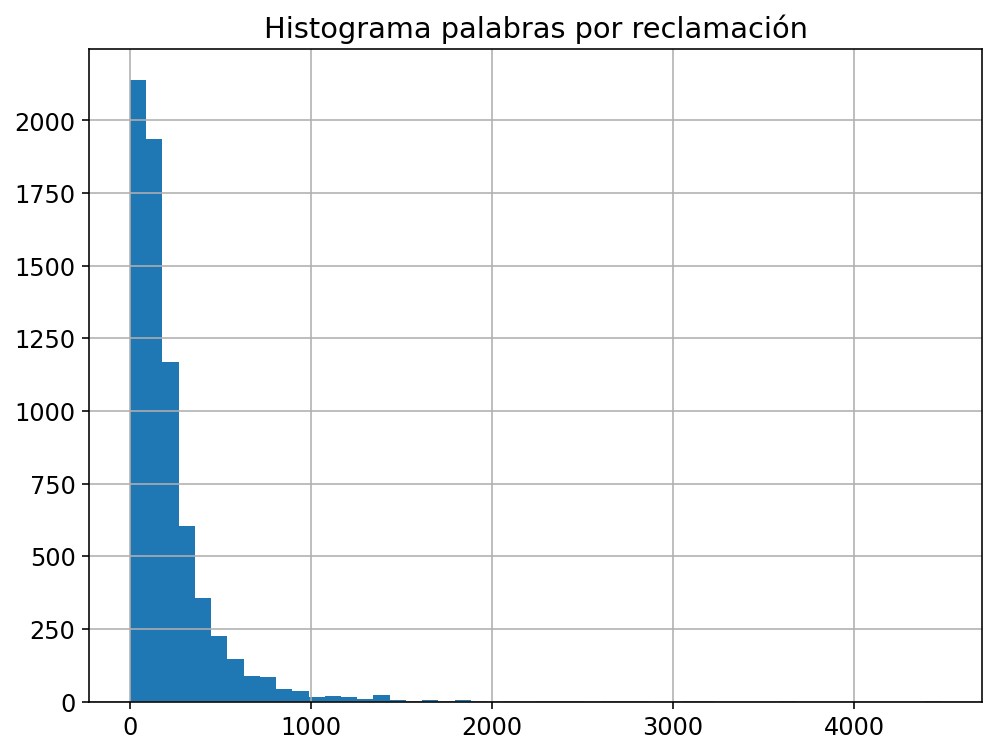

El número medio de palabras por reclamación es 220.48460874568468


In [ ]:
plt.hist(n_words,bins=50)
plt.grid()
plt.title('Histograma palabras por reclamación')
plt.show()


print(f"El número medio de palabras por reclamación es {np.mean(n_words)}")

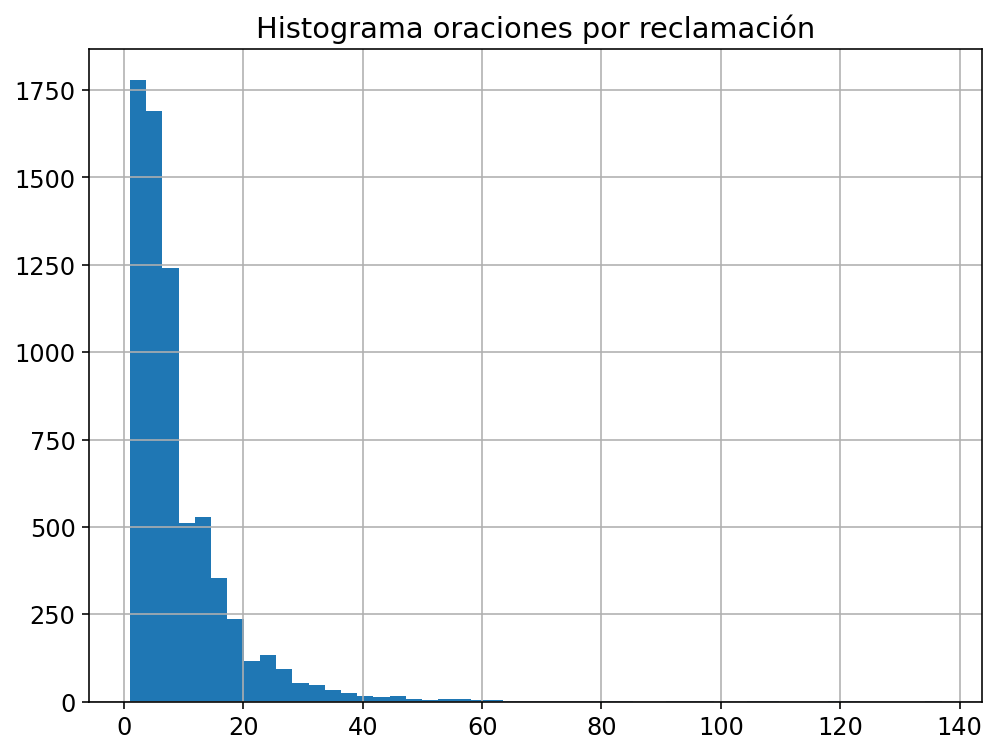

El número medio de oraciones por reclamación es 9.227416570771002


In [ ]:
plt.hist(n_sentences,bins=50)
plt.grid()
plt.title('Histograma oraciones por reclamación')
plt.show()


print(f"El número medio de oraciones por reclamación es {np.mean(n_sentences)}")

Ciertamente este campo puede llegar a ser muy largo, de tal manera que la representación mediante TF-IDF o promedio word2vec puede ser perder capacidad discriminativa. Vamos a pre-procesar el texto para quedarnos con las $I=3$ **oraciones más significativas**.

> **Ejercicio**: Tras filtrar stopping words/signos de puntuación por reclamación, construya con Gensim un diccionario y elimine las palabras que estén en menos de 20 documentos y las que estén por encima del 80% de los documentos. Modifique la función `normalize` para que elimine tokens que empiecen por 'XX', asociados a datos personales anonimizados.

In [ ]:
# Modificamos la función de normalizado para eliminar tokens del tipo 'XX' (Datos personales anonimizados) que aparecen de forma muy frecuente en las quejas

def normalize(doc):
    
    return [w for w in doc if not w.is_stop and w.has_vector and not w.is_punct and w.text[:2]!='XX']

# eliminamos stopping words, puntuaciones y tokens sin word embedding
norm_complaints = [[normalize(s) for s in c.sents] for c in complaints]

# Pasamos a modo texto, usando lemmatización porque vamos a codificar TF-IDF
norm_complaints_text = [[[w.lemma_ for w in s] for s in c] for c in norm_complaints]

# Modo texto, rompiendo la estructura de frases, para construir el diccionario

norm_complaints_text_2 = [[w for s in c for w in s] for c in norm_complaints_text]

In [ ]:
import gensim

D = gensim.corpora.Dictionary(norm_complaints_text_2)

no_below = 20 #Minimum number of documents to keep a term in the dictionary
no_above = .8 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 1985 terms
First terms in the dictionary:
0 : 609
1 : FCRA
2 : accord
3 : address
4 : company
5 : continue
6 : contract
7 : credit
8 : dispute
9 : file


A continuación, vamos a crear una función para obtener las $I=3$ oraciones más significativas de cada reclamación. Esta función usa el método TextRank visto en la sesión 3 del curso.

> **Ejercicio:** Complete el código de la función

In [ ]:
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense, corpus2csc
import networkx


def resumen_reclamación(I,list_sentences,list_sentences_text,D):
    
    """
    I: número de oraciones
    list_sentences: lista de oraciones del documento (secuencias de tokens de spacy)
    list_sentences_text: lista de oraciones del documento en modo texto
    D: diccionario 
    
    Esta función devuelve una secuencia de I objetos de tipo spacy.Doc con las oraciones más significativas
    """
    
    list_summarized = []
    
    if(len(list_sentences)<=I):
        
        list_summarized = list_sentences
    
    else:
        
        doc_bow = [D.doc2bow(doc) for doc in list_sentences_text]
        
        n_tokens = len(D)
        
        num_docs = len(doc_bow)

        model = TfidfModel(doc_bow)  

        doc_tfidf = model[doc_bow]

        doc_tfidf_dense = corpus2dense(doc_tfidf, num_terms=n_tokens, num_docs=num_docs)

        A = doc_tfidf_dense.T@doc_tfidf_dense
        
        similarity_graph = networkx.from_numpy_array(A)
        
        scores = networkx.pagerank(similarity_graph)

        scores_values = np.fromiter(scores.values(), dtype=float)

        top_sentence_indices = np.argsort(-scores_values)
        
        list_summarized = [list_sentences[i] for i in top_sentence_indices[:I]]
        
    return list_summarized
        

Imprimimos el texto orignal de una queja

In [ ]:
print(complaints[5])

On XX/XX/XXXX I initiated an online dispute to Equifax regarding XXXX unauthorized inquiries on my credit report. On XX/XX/XXXX I  received an email from Equifax stating all inquires came back as factual record ( 5 day investigation ). I called Equifax on XX/XX/XXXX around XXXX XXXX and spoke to a rep by the name of XXXX and requested he send me the documentation they have ( from each company ) showing I authorized all of these companies to pull my credit report. XXXX stated " they do n't have any documentation '', he stated the companies are not required to provide that information and for me to call the company. I advised XXXX that the CB is responsible for making sure all things are factual before reporting. I requested to speak with a manager and  was transferred to another gentlemen by the name of XXXX. I explained to XXXX that I am now requesting documentation they used to confirm I authorized theses companies to pull my credit report. XXXX stated they can go by word of mouth fro

su versión normalizada

In [ ]:
print(norm_complaints[5])

[[initiated, online, dispute, Equifax, unauthorized, inquiries, credit, report], [received, email, Equifax, stating, inquires, came, factual, record, 5, day, investigation], [called, Equifax, spoke, rep, requested, send, documentation, company, showing, authorized, companies, pull, credit, report], [stated, documentation, stated, companies, required, provide, information, company], [advised, CB, responsible, making, sure, things, factual, reporting], [requested, speak, manager, transferred, gentlemen], [explained, requesting, documentation, confirm, authorized, s, companies, pull, credit, report], [stated, word, mouth, companies], [means, social, security, number, try, obtain, credit], [stated, companies, pulled, credit, inquires, members, Equifax, tend, believe, info, provide], [requested, recorded, line, submit, information, states, inquires, factual, party, able, provide, information], [stated, document], [inquires, authorize, like, deleted]]


y su versión resumida ...

In [ ]:
print(resumen_reclamación(3,norm_complaints[5],norm_complaints_text[5],D))

[[called, Equifax, spoke, rep, requested, send, documentation, company, showing, authorized, companies, pull, credit, report], [stated, documentation, stated, companies, required, provide, information, company], [stated, companies, pulled, credit, inquires, members, Equifax, tend, believe, info, provide]]


> **Ejercicio:** Utilice la función anterior para resumir cada reclamación a un máximo de $I=3$ oraciones. Guarde el resultado en la lista `complaints_summarized`

In [ ]:
complaints_summarized = [resumen_reclamación(3,c,d,D) for (c,d) in zip(norm_complaints,norm_complaints_text)]

A continuación vamos a realizar una agrupación de las reclamaciones. En este caso, utilizaremos TF-IDF para obtener una interpretabilidad directa de los centroides. Se deja como trabajo al alumno la utilización de otra representación de cada documento (doc2Vec, average word-embeddings...). 

> **Ejercicio**: Calcule la codificación TF-IDF de cada reclamación resumida. Implemente un K-means, estudiando la función de coste y el coeficiente de silueta con el número de grupos. 

In [ ]:
# Pasamos a texto concatenando las 2 frases por documento

complaints_summarized_text = [[w.lemma_.lower() for s in c for w in s] for c in complaints_summarized]

In [ ]:
corpus_bow = [D.doc2bow(doc) for doc in complaints_summarized_text]

model = TfidfModel(corpus_bow)  

corpus_tfidf = model[corpus_bow]

n_tokens = len(D)
num_docs = len(corpus_bow)

# Convert TFIDF representacion
C = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

print(f"La dimensión de la matriz TF-IDF es {C.shape[0]} x {C.shape[1]}")

La dimensión de la matriz TF-IDF es 6952 x 1985


In [ ]:
norms = np.linalg.norm(C,axis=1)
norms[norms<=1e-6] = 1e-6

C_ = C/norms.reshape([-1,1])

In [ ]:
K_list = range(5,15)

L = []
SC = []
knns = {}

for k in K_list:
    
    print(k)
    kmeans = MiniBatchKMeans(n_clusters=k,n_init = 100,batch_size=500) # Para cada valor de $K$ lanzamos 100 veces K-means
    kmeans.fit(C_)
    L.append((kmeans.inertia_)/(C_.shape[0]))
    y_kmeans = kmeans.predict(C_) # Obtenemos el identificador del grupo para cada dato
    SC.append(silhouette_score(C_,y_kmeans))
    
    knns[k] = kmeans

5
6
7
8
9
10
11
12
13
14


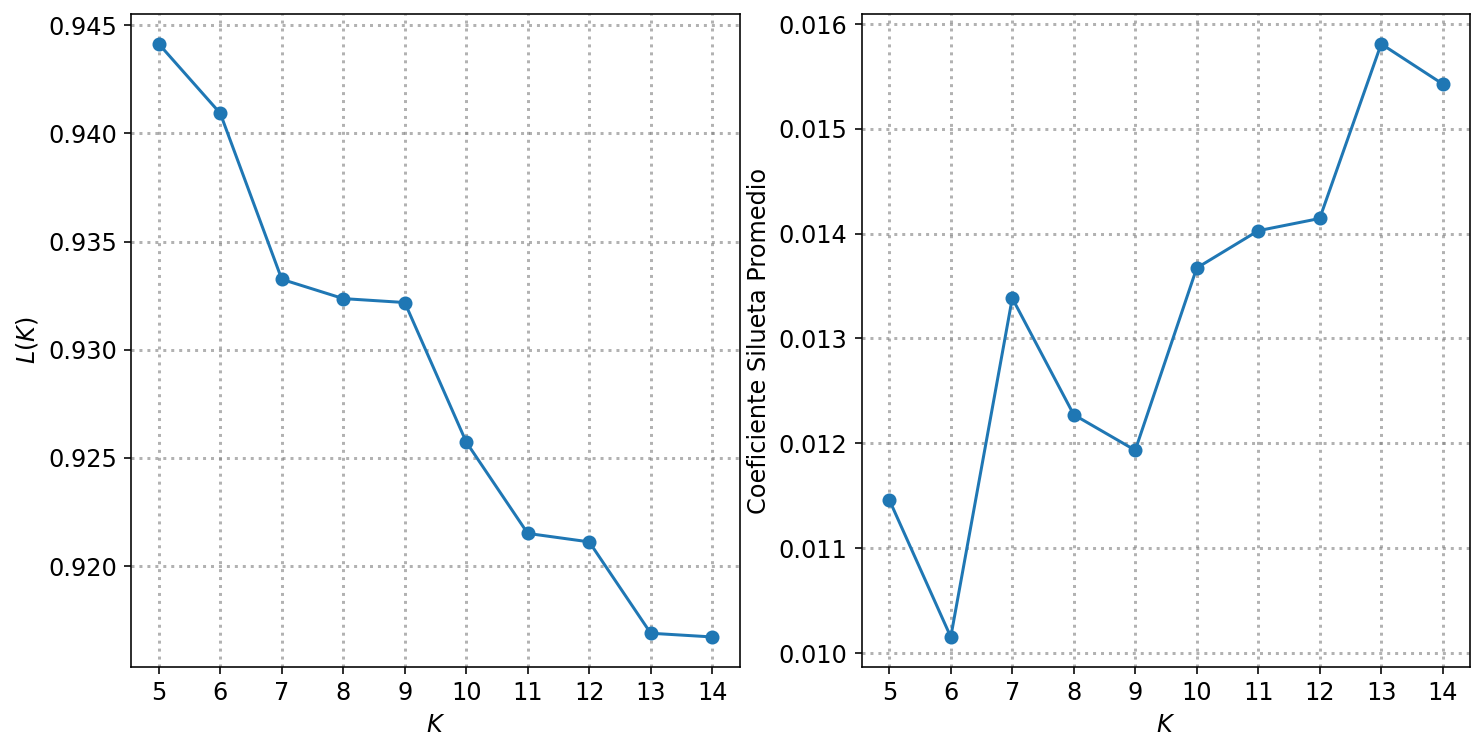

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(K_list,L,'-o')
ax[0].set_xticks(K_list);

ax[0].set_xlabel('$K$')
ax[0].set_ylabel('$L(K)$')
ax[0].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

#ax[1].plot(6,L[5],'rs',ms=15,label='Codo')
ax[1].plot(K_list,SC,'-o')

ax[1].set_xlabel('$K$')
ax[1].set_ylabel('Coeficiente Silueta Promedio')
ax[1].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax[1].set_xticks(K_list);

De nuevo parece que los grupos se separan de forma razonable. El incremento del coeficiente de silueta sugiere que los grupos que se van generando son consistentes. Para poder interpretar los grupos de forma sencilla, vamos a quedarnos con un valor intermedio. $K=6$.

In [ ]:
K = 6

group_complaint_per_data = knns[K].predict(C_) # Obtenemos el identificador del grupo para cada dato
centroids = knns[K].cluster_centers_

ordered_centroids = knns[K].cluster_centers_.argsort()[:, ::-1]
idx_per_cluster = [np.where(group_complaint_per_data==k) for k in range(K)]

In [ ]:
## Imprimimos 3 documentos por grupo, también las palabras más relevantes

for k in range(K):
    
    idx = idx_per_cluster[k][0]
    
    print(f'Cluster {k}: {idx.shape[0]} documents')
    
    relevant_words = [D[i] for i in ordered_centroids[k,:20]]
    
    print(f'Relevant words: {relevant_words}')
    
    for j in range(3):
        
        print('-----')
        print(df_red.iloc[idx[j]]['Consumer complaint narrative'])
        #print(complaints_summarized_text[idx[j]])
        
    print('******************************************')

Cluster 0: 622 documents
Relevant words: ['payment', 'late', 'loan', 'month', 'pay', 'day', 'report', 'account', 'statement', 'monthly', 'credit', 'time', 'mortgage', 'date', '30', '$', 'receive', 'bank', 'show', 'apply']
-----
XXXX Details Account # XXXX A payment was sent but never received. I have had a perfect payment record and te company is reporting a payment having been late.
-----
I had a shared account with my wife at Bank of America. Bank of America closed my account because my wife 's identity proof was out of date. I got a check with all the balance in my account. This also XXXX all auto-payments I had set up to pay for my credit cards with Bank of America. I went back to the bank and reopened my account, but forgot to set up auto payments which had gotten XXXX. This resulted in late payments on my credit card which has negatively impacted my credit score. My credit scores dropped by more than 50 points. 

XX/XX/XXXX - I got a letter from Bank of America saying my wife 's 

## 2.3 Distribución de la variable asunto (issue) en las reclamaciones

Finalmente, vamos a estudiar cómo las distintos grupos de la variable `Issue` (asunto) que encontramos en la sección 2.1 se distribuyen en los grupos encontrados para las reclamaciones encontrados en la sección 2.2. Para ello recordamos que:

* `group_issue_per_data` es un vector que contiene el grupo en el que cada dato se encuentra con respecto a `Issue`. Hay 10 grupos.
* `group_complaint_per_data` es un vector que contiene el grupo en el que cada dato se encuentra con respecto a `Consumer complaint narrative`. Hay 6 grupos.

> **Ejercicio:** Representar el histograma de `group_issue_per_data` para los 5 grupos encontrados con respecto a `Consumer complaint narrative`.

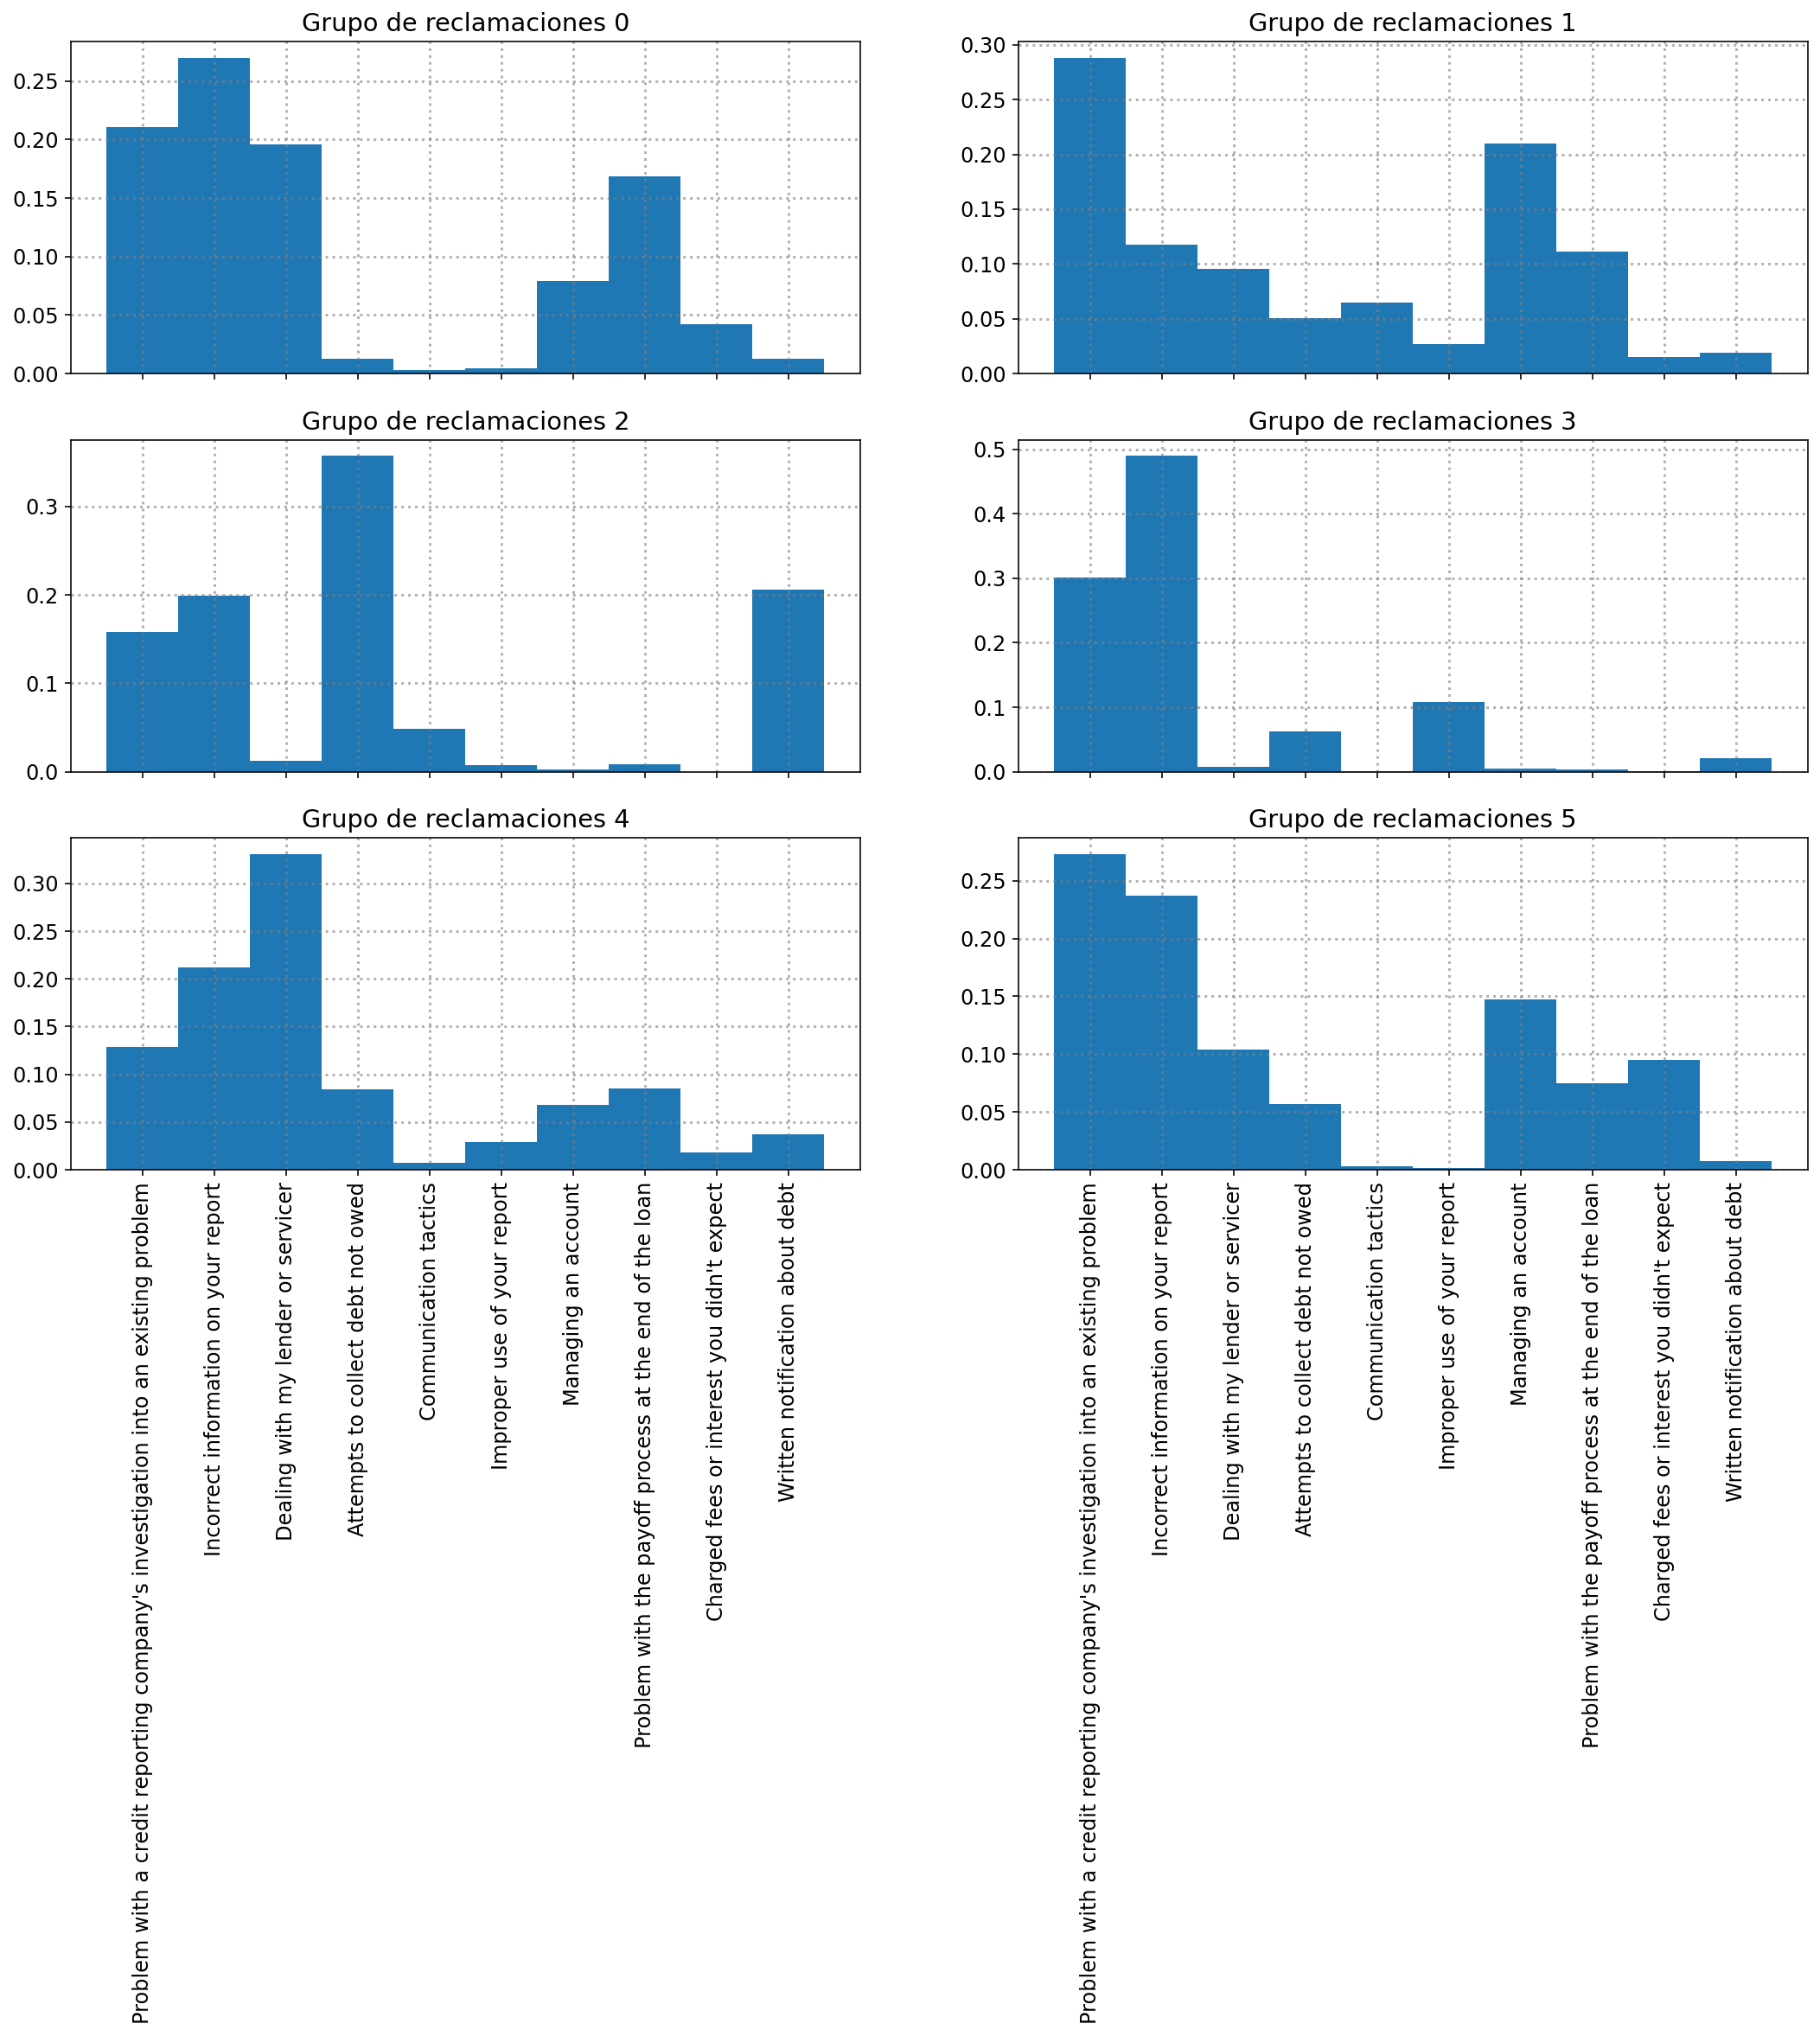

In [ ]:
# Dibujemos el histograma de etiquetas REALES presentes en cada grupo

fig, ax = plt.subplots(nrows=K//2, ncols=2 , figsize=(18, 12), sharex=True)

d = np.diff(np.unique(group_issue_per_data)).min()
left_of_first_bin = group_issue_per_data.min() - float(d)/2
right_of_last_bin = group_issue_per_data.max() + float(d)/2

for i in range(K):
    
    row = i//2
    col = i%2
    
    ax[row][col].hist(group_issue_per_data[group_complaint_per_data==i], np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
    ax[row][col].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
    ax[row][col].set_title("Grupo de reclamaciones {0:d}".format(i))
    ax[row][col].set_xticks(range(np.max(group_issue_per_data)+1))
    ax[row][col].set_xticklabels(etiquetas_issues,rotation=90)


En el gráfico anterior, podemos comprobar cómo al margen del asunto *Incorrect Information*, los distintos asuntos se reparten de forma no uniforme a lo largo de los grupos de reclamaciones. Esto era de esperar y permite perfilar los distintos grupos encontrados.

Alternativamente podemos utilizar alguna métrica de clustering para agrupar las quejas que tenga en cuenta el label dado por `group_issue_per_data`. Un ejemplo sencillo es la métrica [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score):

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

homogeneity_score(group_issue_per_data,group_complaint_per_data)

0.14103347024978943

In [ ]:
K_list = range(5,15)

HS = []

for k in K_list:

    y_kmeans = knns[k].predict(C_) # Obtenemos el identificador del grupo para cada dato
    HS.append(homogeneity_score(group_issue_per_data,y_kmeans))
    

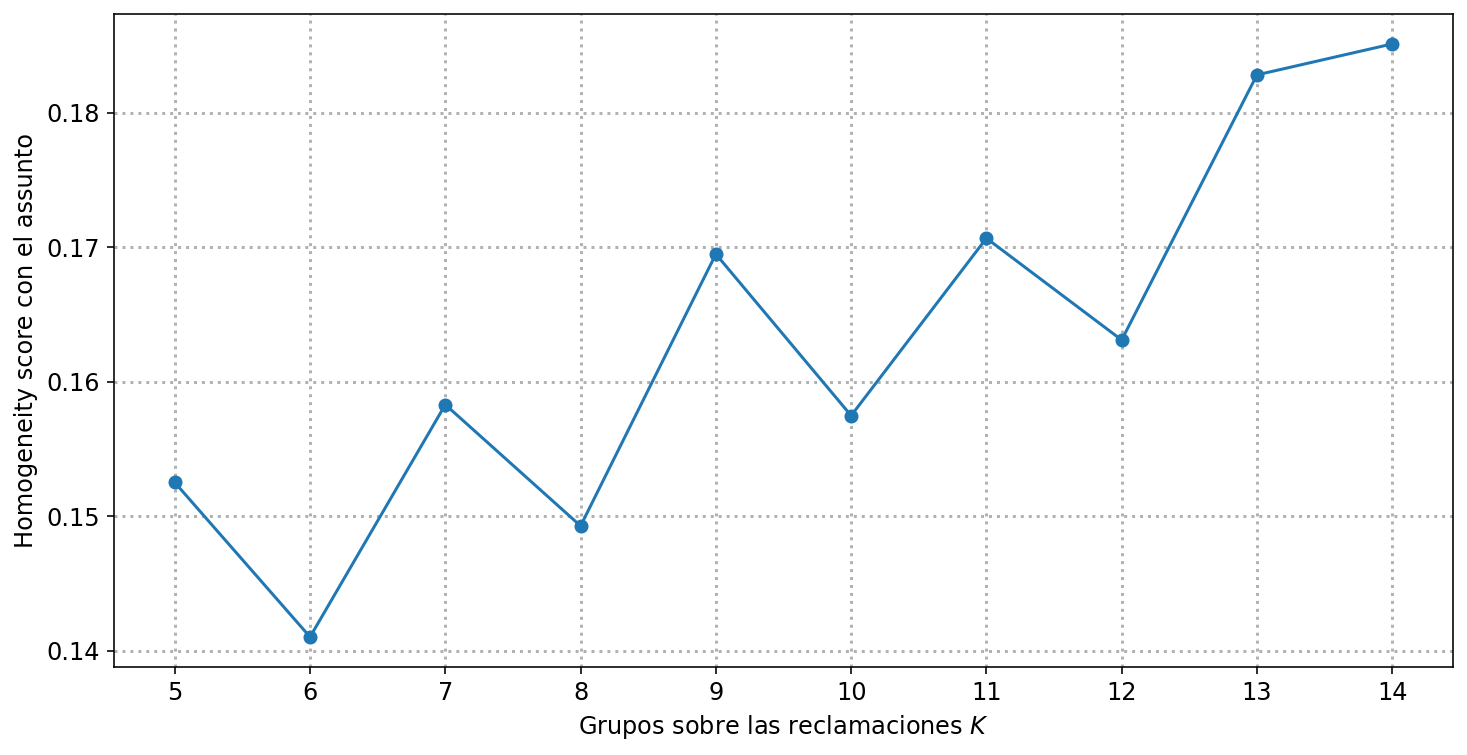

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

ax.plot(K_list,HS,'-o')
ax.set_xticks(K_list);

ax.set_xlabel('Grupos sobre las reclamaciones $K$')
ax.set_ylabel('Homogeneity score con el assunto')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

## 2.4 Otros algoritmos de clustering frecuentes en aplicaciones NLP

Al margen de K-means, existen numerosas alternativas para encontrar agrupaciones en la librería [Sklearn](https://scikit-learn.org/stable/modules/clustering.html):

* **Modelos de mezcla de Gaussianas** (GMMs): Se realiza una estimación de densidad de los datos como una mezcla de un cierto número de distribuciones Gaussianas. Es más pesado de entrenar que K-means, sobre todo si utilizamos matrices de covarianza completas. Permite hacer **soft clustering**, esto es, obtener una probabilidad de pertenencia a cada cluster.

* **Afinitty Propagation** (AF): es un algoritmo de paso de mensajes en el que se buscan los puntos de la base de datos más representativos para con los demás. **No hay que especificar un número a priori de clusters**. Su principal problema es la escalabilidad, ya que su complejidad crece como $N^2$, siendo $N$ el número de puntos.

* **Ward hierarchical clustering**: es un algoritmo jerárquico, en el que agrupaciones anidadas se fusionan o dividen sucesivamente. Esta jerarquía de grupos se representa como un árbol (o dendrograma). En **agglomerative clustering**, cada observación comienza en su propio grupo y los grupos se fusionan sucesivamente. Los grupos se fusionan para minimizar la suma de diferencias cuadradas dentro de todos los grupos.

En todos los casos, podemos validar de forma agnóstica las agrupaciones de acuerdo a [distintas métricas](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

# 3. Analisis de opinión (sentiment analysis). Métricas de clasificación.

En esta sección repasaremos métricas básicas de clasificación, que ilustraremos en un problema de análisis de opinión en una base de datos de textos extraídos de noticias de finanzas. 

Como clasificador base, utilizaremos regresión logística.

## 3.1 Regresión logística y regularización

En la última sesión, presentamos regresión logística para clasificación binaria y multiclase. Dado un conjunto de entrenamiento $\{\mathbf{x}^{(i)},y^{(i)}\}_{i=1}^N$, donde $\mathbf{x}\in\mathbf{R}^m$ e $y_i \in\{1,\ldots,K\}$.


\begin{align}
P(y=k|\mathbf{x}) = \frac{\text{e}^{z_k}}{\sum_{j=1}^{K}\text{e}^{z_j}}, k =1,\ldots,K
\end{align}
donde el vector $\mathbf{z} = \left[z_1,\ldots,z_K\right]$ se calcula como



$$\mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{w}_0$$

siendo $\mathbf{W}$ una matriz real de dimensiones $K\times m$ y $\mathbf{w_0}$ un vector de dimensiones $K \times 1$.

La función de coste (cross entropy) se calcula como la suma  del logaritmo de la probabilidad que damos a cada etiqueta real del conjunto de entrenamiento:

$$l({\bf W,w_0}) = - \sum_{i=1}^N \sum_{j=1}^{K} \log \left(  P(Y=k| {\bf x}^{(i)})\right) \mathbb{1}[y^{(i)}==k]$$


$${\bf W^*,w^*_0} =\displaystyle \underset{{\bf W,w_0}}{\operatorname{min}} l({\bf W,w_0})$$

### Regularización L2 y L1

Para prevenir el sobreajuste, es habitual penalizar la magnitud de los pesos añadiendo un término de **regularización** en la función de coste del RL:


* Regularización cuadrática (L2):

$${\bf W^*,w^*_0} =\displaystyle \underset{{\bf W,w_0}}{\operatorname{min}} l({\bf W,w_0}) + \frac{1}{C} \Vert {\bf W} \Vert_2^2$$

* Regularización absoluta (L1):

$${\bf W^*,w^*_0} =\displaystyle \underset{{\bf W,w_0}}{\operatorname{min}} l({\bf W,w_0}) + \frac{1}{C} \Vert {\bf W} \Vert_1$$

donde $l({\bf w})$ es la función de coste de RL que vimos anteriormente, $\Vert {\bf W} \Vert_2^2 = \sum (w_{ij})^2$ y $\Vert {\bf W} \Vert_1 = \sum |w_{ij}|$.

L2 consigue una regularización más uniforme a lo largo de todos los pesos (y algo mejor de precisión de clasificación ya que tiene más grados de libertad), mientras que con L1 la solución tiende a ser *sparse*, muchos pesos se van a cero y esto nos permite determinar qué características de entrada son más relevantes para el modelo.

La [implementación de RL en sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) nos permite selccionar de forma sencilla el tipo de regularización y el parámetro $C$.


## 3.2 Analisis de opinión en finanzas

Nuestro objetivo ahora es entrenar un clasificador RL para predecir si un titular de una noticia financiera puede tener una influencia positiva, negativa o neutra en el mercado financiero. La base de datos [Finantial Phrase Bank](https://www.researchgate.net/profile/Pekka-Malo/publication/251231364_FinancialPhraseBank-v10/data/0c96051eee4fb1d56e000000/FinancialPhraseBank-v10.zip) contiene cerca de 5000 oraciones extraídas de textos de noticias financieras:


>*This release of the financial phrase bank covers a collection of 4840 sentences. The selected collection of phrases was annotated by 16 people with adequate background knowledge on financial markets. Three of the annotators were researchers and the remaining 13 annotators were master’s students at Aalto University School of Business with majors primarily in finance, accounting, and economics.*
>
>*The objective of the phrase level annotation task was to classify each example sentence into a positive, negative or neutral category by considering only the information explicitly available in the given sentence. Since the study is focused only on financial and economic domains, the annotators were asked to consider the sentences from the view point of an investor only; i.e. whether the news may have positive, negative or neutral influence on the stock price. As a result, sentences which have a sentiment that is not relevant from an economic or financial perspective are considered neutral.*

Vamos a cargar la base de datos y proceder al pre-procesado.

In [ ]:
#from google.colab import files

#uploaded = files.upload()

In [ ]:
with open("Sentences.txt", "r", encoding="ISO-8859-1") as sentences:
    lines = sentences.readlines()

In [ ]:
print(lines[0])

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral



> **Ejercicio:** Separe en dos listas cada oración y su etiqueta. Codifique las etiquetas con 0 (neutra), 1 (negativa) y 2 (positiva). Represente el histograma de las etiquetas en el dataset.

In [ ]:
phrases = [l.split('@')[0] for l in lines]
opinions = [l.split('@')[1] for l in lines]


def code_opinion(l):
    
    d = 0
    
    if (l=='negative\n'):
        
        d = 1
        
    elif (l=='positive\n'):
        
        d = 2
        
    return d

labels = np.array([code_opinion(l) for l in opinions])
    

In [ ]:
df = pd.DataFrame({"Phrase":phrases,
                  "Opinion":opinions})

df

,Phrase,Opinion
0,"According to Gran , the company has no plans t...",neutral\n
1,With the new production plant the company woul...,positive\n
2,"For the last quarter of 2010 , Componenta 's n...",positive\n
3,"In the third quarter of 2010 , net sales incre...",positive\n
4,Operating profit rose to EUR 13.1 mn from EUR ...,positive\n
...,...,...
5712,Operating result for the 12-month period decre...,negative\n
5713,HELSINKI Thomson Financial - Shares in Cargote...,negative\n
5714,LONDON MarketWatch -- Share prices ended lower...,negative\n
5715,Operating profit fell to EUR 35.4 mn from EUR ...,negative\n


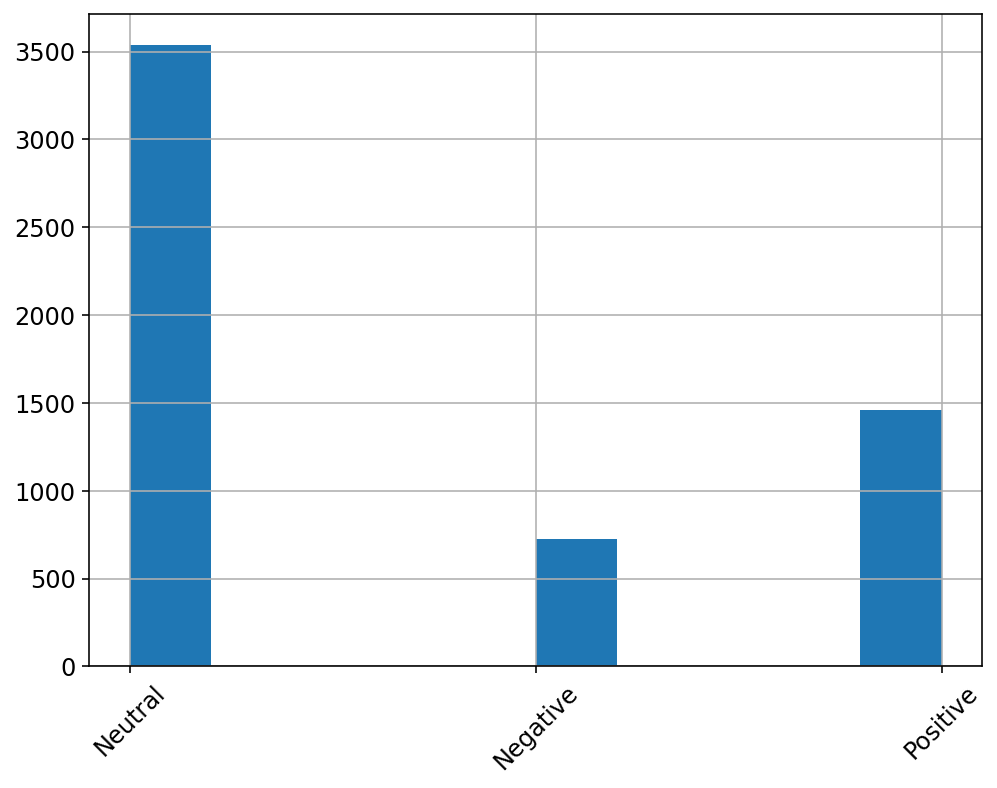

In [ ]:
fig,ax = plt.subplots(1,1)

ax.hist(labels)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Neutral','Negative','Positive'],rotation=45)
ax.grid()


Vamos a entrenar un RL **binario** para clasificar cada oración entre negativa y neutral/positiva. Observe que la base de datos está muy desbalanceada. **Utilizamos la etiqueta 1 para la clase minoritaria (revisión negativa) y 0 para la mayoritaria (revisión positiva/neutral)**.

>**Ejercicio:** Divida el conjunto de datos en entrenamiento (80%) y test (20%). Determine el % de etiquetas correctas de un clasificador que siempre proporcione la etiqueta 0


In [ ]:
from sklearn.model_selection import train_test_split

labels_bin = labels.copy()

labels_bin[labels_bin==2] = 0 

idx_data = np.arange(0,labels.shape[0],1)

# Separamos train de test
idx_train, idx_test, y_train, y_test = train_test_split(idx_data, labels_bin, test_size=0.2, random_state=0)

acc_baseline_train = np.sum(y_train==0)/y_train.shape[0]

print(f"El % de etiquetas correctas del clasificador baseline es {acc_baseline_train}")

El % de etiquetas correctas del clasificador baseline es 0.8725125738027553


> **Ejercicio:** Preprocese la base de datos y represente cada oración tanto por su vector TF-IDF como su vector embedding promedio. El diseño del diccionario se hace usando **el conjunto de train**.

In [ ]:
docs = [nlp(c) for c in phrases]

# eliminamos stopping words, puntuaciones y tokens sin word embedding
norm_docs = [normalize(d) for d in docs]

# Pasamos a modo texto
norm_docs_text = [[w.lemma_.lower() for w in d] for d in norm_docs]

# Volvemos a crear una lista de objetos spacy.Doc y extraemos la media de los word embeddings ...
W = np.array([nlp(' '.join(d)).vector for d in norm_docs_text])

print(f"La dimensión de la matriz de embeddings es {W.shape[0]} x {W.shape[1]}")


La dimensión de la matriz de embeddings es 5717 x 300


In [ ]:
# Diccionario y TF-IDF

D = gensim.corpora.Dictionary([norm_docs_text[d] for d in idx_train])

no_below = 5 #Minimum number of documents to keep a term in the dictionary
no_above = .8 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above)

corpus_bow = [D.doc2bow(doc) for doc in norm_docs_text]

model = TfidfModel(corpus_bow)  

corpus_tfidf = model[corpus_bow]

n_tokens = len(D)
num_docs = len(corpus_bow)

# Convert TFIDF representacion
C = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

print(f"La dimensión de la matriz TF-IDF es {C.shape[0]} x {C.shape[1]}")

La dimensión de la matriz TF-IDF es 5717 x 1685


> **Ejercicio:** Entrene un clasificador RL binario sobre la representación TF-IDF. Utilice regularización L1 para determinar las palabras más relevantes. Calcule el porcentaje de etiquetas correctamente clasificadas y e imprima las palabras más relevantes para la clasificación.

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV

rango_C = np.logspace(-3, 3, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^3, a 10^3.
diccionario_parametros = [{'C': rango_C}]   
nfold = 10 # Número de particiones train/validación

""" Ajusto C por validación cruzada
El optimizador por defecto ('lbfgs') no acepta regularización l1. 
Usamos 'liblinear' siguiendo las recomendaciones de la librería.
"""
LR_with_CV  = GridSearchCV(estimator=LR(penalty='l1',max_iter=1e08,solver='liblinear'),
                                  param_grid=diccionario_parametros,cv=nfold)
# Entrenar el modelo
LR_with_CV.fit(C[idx_train,:],y_train)   

print("El mejor parámetro C es {0:.2f}".format(LR_with_CV.best_params_['C']))
                        
# Score de claisficación en train/test
accuracy_train = LR_with_CV.score(C[idx_train,:],y_train)   
accuracy_test = LR_with_CV.score(C[idx_test,:],y_test)  

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train*100, accuracy_test*100))


El mejor parámetro C es 26.37
Accuracy train 99.83%. Accuracy test 95.45%



Como vemos, mejoramos nuestro baseline y el modelo presenta cierto sobreajuste.

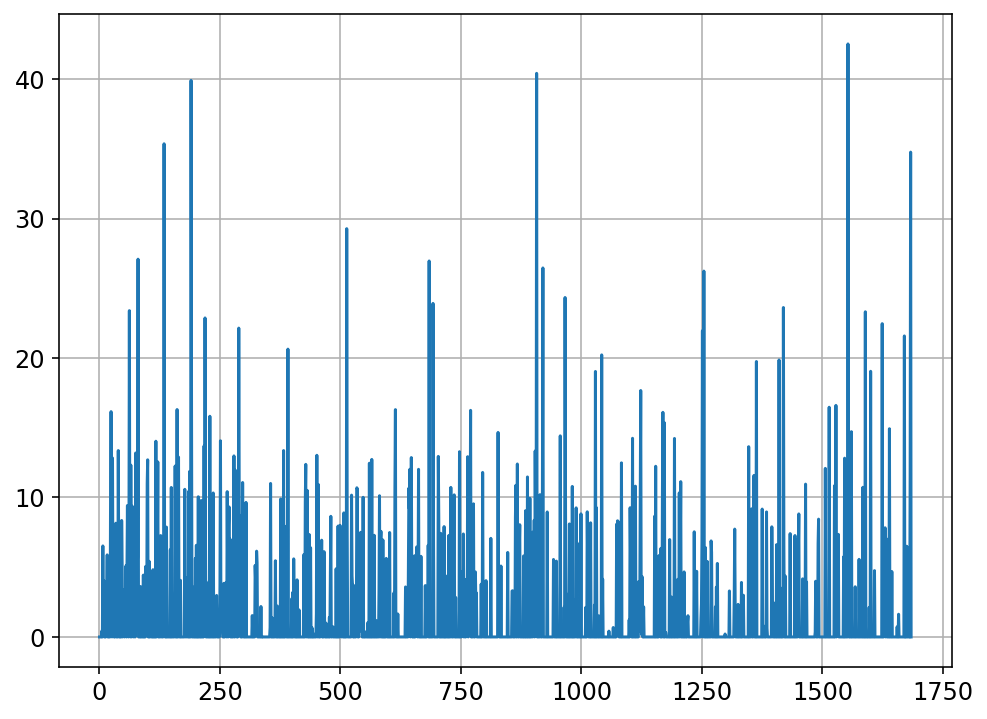

La fracción de pesos con valor inferior a 1e-03 es 0.6949554896142434

Las 50 palabras más relevantes para la clasificación son ['lower', 'drop', 'decrease', 'fall', 'strike', '30', 'rise', 'lose', 'decline', '11.9', 'seven', 'slide', 'suffer', 'grow', 'slow', 'operation', 'warn', 'low', 'weak', '2,000', 'electronics', 'range', 'slip', '200,000', 'recent', 'situation', 'negative', '2.4', 'tackle', 'small', 'improve', '7.8', 'warning', 'restructuring', '17', 'approximately', 'excess', 'fold', '13.6', 'hit', 'associate', '63', '0.4', 'executive', 'contract', 'cost', 'atria', 'h1', '2008', 'jump']


In [ ]:
# Dibujemos los pesos del clasificador
plt.plot(np.abs(LR_with_CV.best_estimator_.coef_.T))
plt.grid()
plt.show()

fraction = np.sum(np.abs(LR_with_CV.best_estimator_.coef_)<1e-03)/C.shape[1]

print(f"La fracción de pesos con valor inferior a 1e-03 es {fraction}\n")

idx_sorted = np.argsort(-np.abs(LR_with_CV.best_estimator_.coef_))[0]

relevant_words = [D[i] for i in idx_sorted[:50]]

print(f"Las 50 palabras más relevantes para la clasificación son {relevant_words}")

> **Ejercicio**: Utilice ahora la codificación de embeddings por documento. Entrene el RL utilizando regularización L2. 

In [ ]:
from sklearn.preprocessing import StandardScaler

# A diferencia de TF-IDF, en este caso normalizamos las características (columnas de W)

transformer = StandardScaler().fit(W[idx_train,:])   

W_train = transformer.transform(W[idx_train,:])
W_test = transformer.transform(W[idx_test,:])


rango_C = np.logspace(-3, 3, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^3, a 10^3.
diccionario_parametros = [{'C': rango_C}]   
nfold = 10 # Número de particiones train/validación

emb_LR_with_CV = GridSearchCV(estimator=LR(penalty='l2',max_iter=1e04),param_grid=diccionario_parametros,cv=nfold)
# Entrenar el modelo
emb_LR_with_CV.fit(W_train,y_train)   

print("El mejor parámetro C es {0:.2f}".format(emb_LR_with_CV.best_params_['C']))
                        
# Score de claisficación en train/test
accuracy_train = emb_LR_with_CV.score(W_train,y_train)   
accuracy_test = emb_LR_with_CV.score(W_test,y_test)  

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train*100, accuracy_test*100))


El mejor parámetro C es 0.16
Accuracy train 93.48%. Accuracy test 93.09%



Como vemos, hay una ligera pérdida de prestaciones, pero obtenemos una solución menos sobreajustada. 

**Nota:** Sería interesante calcular la media de los embeddings usando sólo las palabras correspondientes a coeficientes distintos de cero en el RL entrenado sobre TF-IDF. Se deja como ejercicio.


## 3.3 Medida de prestaciones en clasificación binaria
---

- Hasta ahora hemos comparado las distintas solucione en base a una métrica, la fracción de etiquetas de train/test correctamente detectadas (*accuracy* en inglés). 
$$$$
- Sin embargo, **no todos los errores son equiparables**:
    - En nuestro problema de *sentiment analysis*, etiquetar un titular como postivo/neutral cuando la etiqueta real es negativa puede suponer pérdidas al ignorar un potencial efecto negativo en la valoración de dicha empresa/producto en el mercado.
    - En general, en cualquier base de datos desbalanceada, utilizar el porcentaje de etiquetas correctamente clasificadas no es una medida justa, al no tener en cuenta la clase minoritaria.
    
A continuación, repasamos una serie de métricas que proporcionan un espectro más completo para caracterizar un clasificador.

En un problema binario, cuando el clasificador realiza una estimación para un nuevo dato podemos diferenciar **cuatro** posibles eventos:

| | **Predicción** $Y=1$ | **Predicción** $Y=0$ |
| --- | --- | --- |
| **Etiqueta real** $Y=1$  | True Positive (TP) | False Negative or Missing (FN)|
| **Etiqueta real** $Y=0$  |  False Positive or False Alarm (FP)  | True Negative (TN) | 

A partir de estos eventos medidos sobre un conjunto de datos clasificados podemos definir las siguientes métricas:
* **Tasa de falsos positivos (o de falsa alarma)** es la razón entre el número de falsos positivos y el número total de datos con etiqueta real $Y=0$ (la fracción de negativos que se nos han colado como positivos):

$$ FPR = \frac{\# FP}{ \# TN + \# FP }$$

* **Especificidad** o *true negative rate* es la razón entre el número de etiquetas negativas correctamente detectadas y el total de datos con etiqueta negativa $Y=0$ (qué fracción de negativos he conseguido detectar del total de negativos):

$$ E = \frac{\# TN}{\# TN + \# FP} = 1- FPR$$


* **Tasa de falsos negativos (o de pérdidas)** es la razón entre el número falsos negativos y el total de datos con etiqueta positiva $Y=1$ (la fracción de positivos que se nos han colado como negativos):

$$ FNR = \frac{\# FN}{ \# TP + \# FN }$$


* **Sensibilidad** o *recall* o *true positive rate* es la razón entre el número de etiquetas positivas correctamente detectadas y el total de datos con etiqueta positiva $Y=1$ (qué fracción de positivos he conseguido detectar del total de positivos):

$$ R = \frac{\# TP}{\# TP + \# FN} = 1- FNR$$


* **Precisión** es la razón entre el número de etiquetas positivas correctamente detectadas y el número total de datos **clasificados** con etiqueta positiva (qué fracción de los que yo he detectado como $Y=1$ realmente lo son):

$$ P = \frac{\# TP}{\# TP + \# FP}$$

La siguiente figura ayuda a entender las anteriores métricas [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="30%"> 

La precisión (P) y el *recall* (R) suelen combinarse en una única métrica denominada **F-score** o **F1-score**:

$$F_{\text{score}} = 2 \frac{P\cdot R}{P+R}$$

Esta métrica varía entre 0 (peor caso) y 1 (mejor caso).

Vamos a calcular algunas de estas métricas para dos de los clasificadores entrenados anteriormente. Usaremos las siguientes funciones directamente proporcionadas por [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html):

- [Precision score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- [Recall score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

> **Ejercicio:** Compare las tres métricas anteriores para la partición de test usando los dos clasificadores entrenados

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score

# Con TF-idf
precision_TFIDF = precision_score(y_test,LR_with_CV.predict(C[idx_test,:]))
recall_TFIDF = recall_score(y_test,LR_with_CV.predict(C[idx_test,:]))
F1_TFIDF = f1_score(y_test,LR_with_CV.predict(C[idx_test,:]))

print("\n Precision P = {0:.2f}".format(precision_TFIDF))
print("\n Recall R = {0:.2f}".format(recall_TFIDF))
print("\n F1 score, F1 = {0:.2f}".format(F1_TFIDF))


 Precision P = 0.85

 Recall R = 0.76

 F1 score, F1 = 0.80


In [ ]:
precision_emb = precision_score(y_test,emb_LR_with_CV.predict(W_test))
recall_emb = recall_score(y_test,emb_LR_with_CV.predict(W_test))
F1_emb = f1_score(y_test,emb_LR_with_CV.predict(W_test))

print("\n Precision P = {0:.2f}".format(precision_emb))
print("\n Recall R = {0:.2f}".format(recall_emb))
print("\n F1 score, F1 = {0:.2f}".format(F1_emb))


 Precision P = 0.74

 Recall R = 0.66

 F1 score, F1 = 0.70


Aparentemente, el clasificador que utiliza embeddings es peor. Pero la perspectiva puede cambiar bajo una métrica distinta.

## 3.4 Variando el umbral de detección

Hasta ahora, hemos supuesto que los distintos clasificadores deciden que la etiqueta asociada a un dato es aquella para la cual la probabilidad estimada es mayor que 0.5. Pero este valor, conocido como **umbral de decisión** es un hiperparámetro más que tenemos que fijar de acuerdo a nuestros requisitos de Precision, Recall, FPR o FNR.

Por ejemplo, si queremos maximizar el Recall en general tomaremos un umbral para detección de clase positiva por debajo de 0.5 (por ejemplo 0.2). 

- Esto incrementará la tasa de datos detectados como positivos y será mas dificil que se nos haya escapado alguno. 

- Pero también incrementará la tasa de falsos positivos y hará bajar la precisión. Esto es, las métricas típicamente están comprometidas unas con otras. 

Para hacernos una idea global del compromiso entre las distintas métricas es habitual analizar la evolución del recall (R) frente a la tasa de falsos positivos (FPR) o bien frente a la precisión (P) a medida que variamos el umbral de decisión.

- En la curva **ROC** (receiver operating characteristic) mostramos la evolución del Recall frente a FPR.
- En la curva **Precision-Recall** mostramos la evolución de la precisión P frente al Recall.

En ambos casos, el comportamiento global se mide utilizando el **área bajo la curva** (AUC). Idealmente, es igual a 1.

Usaremos las funciones [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) y [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) de sklearn. Para el área bajo la curva usamos [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) y [average_precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) respectivamente.

> **Ejercicio:** Compare la curva ROC y el área bajo la curva para los dos clasificadores entrenados

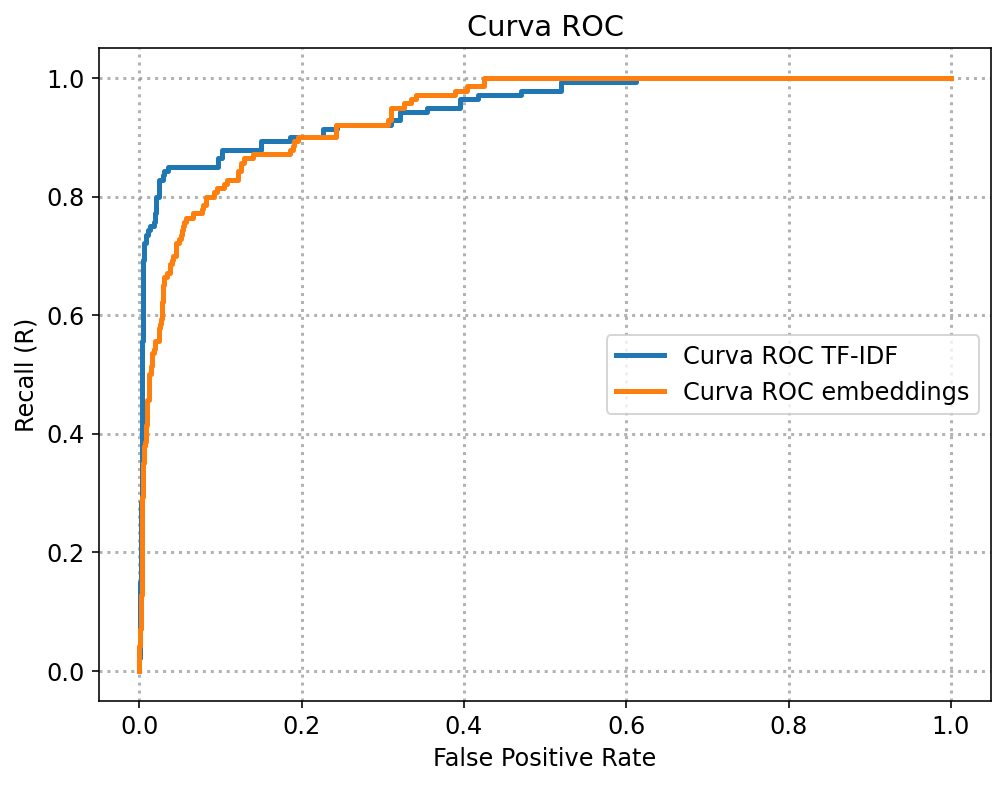

El área bajo la curva ROC de TF-IDF es 0.9507398975526465
El área bajo la curva ROC de embeddings es 0.9395987478656801


In [ ]:
from sklearn import metrics
fpr, recall, thresholds = metrics.roc_curve(y_test, LR_with_CV.predict_proba(C[idx_test,:])[:,1], pos_label=1) 
fpr2, recall2, thresholds = metrics.roc_curve(y_test, emb_LR_with_CV.predict_proba(W_test)[:,1], pos_label=1) 

fig,ax = plt.subplots()
plt.plot(fpr,recall,lw=2.5,label='Curva ROC TF-IDF')
plt.plot(fpr2,recall2,lw=2.5,label='Curva ROC embeddings')
plt.legend(loc=7)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (R)')
plt.title('Curva ROC')
plt.show()

area_roc_tf_idf = metrics.roc_auc_score(y_test, LR_with_CV.predict_proba(C[idx_test,:])[:,1])
area_roc_embbedings = metrics.roc_auc_score(y_test, emb_LR_with_CV.predict_proba(W_test)[:,1])

print(f"El área bajo la curva ROC de TF-IDF es {area_roc_tf_idf}")
print(f"El área bajo la curva ROC de embeddings es {area_roc_embbedings}")

> **Ejercicio:** Compare la curva Precision-Recall y el área bajo la curva para los dos clasificadores entrenados

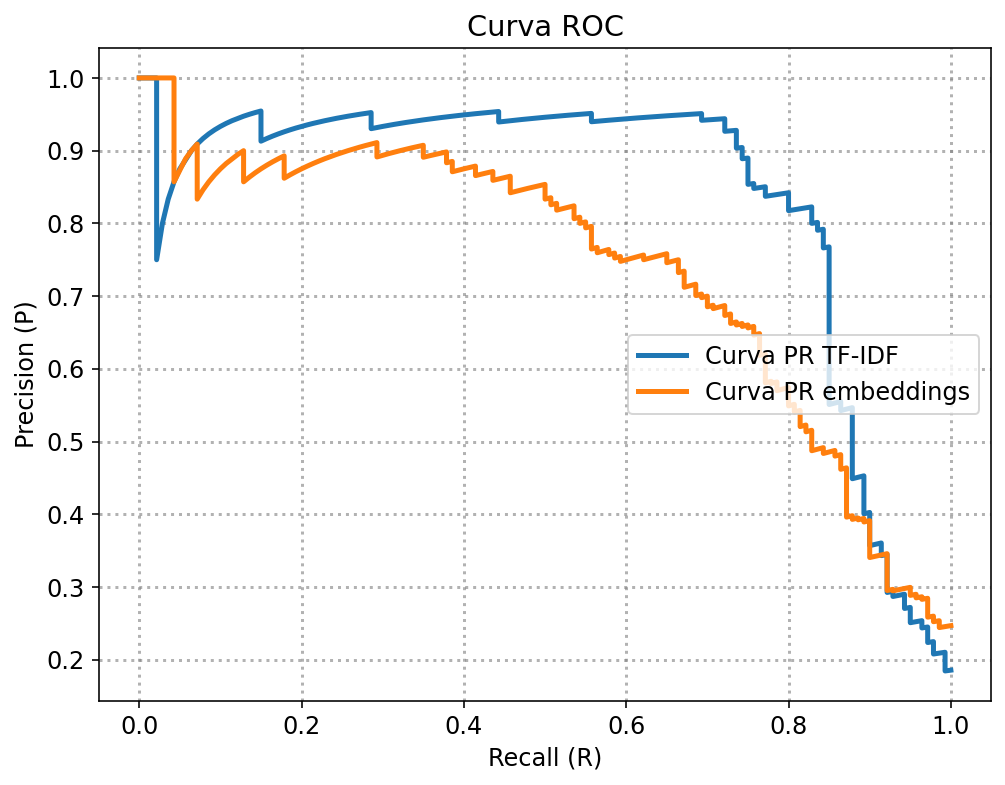

El área bajo la curva PR de TF-IDF es 0.838592303020275
El área bajo la curva PR de embeddings es 0.740158686996372


In [ ]:
P, R, thresholds = metrics.precision_recall_curve(y_test, LR_with_CV.predict_proba(C[idx_test,:])[:,1], pos_label=1) 
P2, R2, thresholds = metrics.precision_recall_curve(y_test, emb_LR_with_CV.predict_proba(W_test)[:,1], pos_label=1) 

fig,ax = plt.subplots()
plt.plot(R,P,lw=2.5,label='Curva PR TF-IDF')
plt.plot(R2,P2,lw=2.5,label='Curva PR embeddings')
plt.legend(loc=7)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('Recall (R)')
plt.ylabel('Precision (P)')
plt.title('Curva ROC')
plt.show()

area_pr_tf_idf = metrics.average_precision_score(y_test, LR_with_CV.predict_proba(C[idx_test,:])[:,1])
area_pr_embbedings = metrics.average_precision_score(y_test, emb_LR_with_CV.predict_proba(W_test)[:,1])

print(f"El área bajo la curva PR de TF-IDF es {area_pr_tf_idf}")
print(f"El área bajo la curva PR de embeddings es {area_pr_embbedings}")

## 3.5 Resultados utilizando otros algoritmos de clasificación: K-NN basado en distancia coseno

La potencia de los espacios de embeddings radica en la similitud semántica entre vecinos, algo que quizá un modelo paramétrico tipo RL no explota directamente. Vamos a comprobar las prestaciones de un [K-NN](https://scikit-learn.org/stable/modules/neighbors.html#classification) para realizar la clasficación basada en los embeddings por pregunta. Puesto que internamente, la [implementación de K-NN de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) sólo utiliza distancia euclídea, vamos a normalizar la matriz `W` **por filas**.

#### Distancia euclídea y coseno en vectores normalizados

Cuando nuestros vectores $x$ e $y$ están normalizados ($||x||^2 = x^Tx = 1$), sus distancias euclídeas $||x-y||^2$  y coseno $d(x,y)$ están relacionas por la siguiente igualdad:

$$||x-y||^2 = x^Tx + y^Ty - 2 x^Ty = 2  (1 - x^Ty) = 2  d(x,y)$$

 En este caso, usar la distancia euclídea nos va a dar los mismos resultados que la distancia coseno.



In [ ]:
norms = np.linalg.norm(W,axis=1)

norms[norms<1e-6] = 1e-6

W_ = W/norms.reshape([-1,1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento k-NN con validación de vecinos y ponderación de distancias
K_max = 15
rango_K = np.arange(1, K_max+1)
nfold = 10
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'n_neighbors': rango_K,'weights':['uniform','distance']}]

# Validación cruzada con GridSearchCV
knn = GridSearchCV(estimator=KNeighborsClassifier( ), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
knn.fit(W_[idx_train,:],y_train)
# Test
accuracy_train_knn = knn.score(W_[idx_train,:],y_train)
accuracy_test_knn = knn.score(W_[idx_test,:],y_test)

print("El número de vecinos seleccionado es k={0:d}".format(knn.best_params_['n_neighbors']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de vecinos seleccionado es k=12
Accuracy train 100.00%. Accuracy test 95.54%



> **Ejercicio:** Calcule el área bajo las curvas ROC y PR

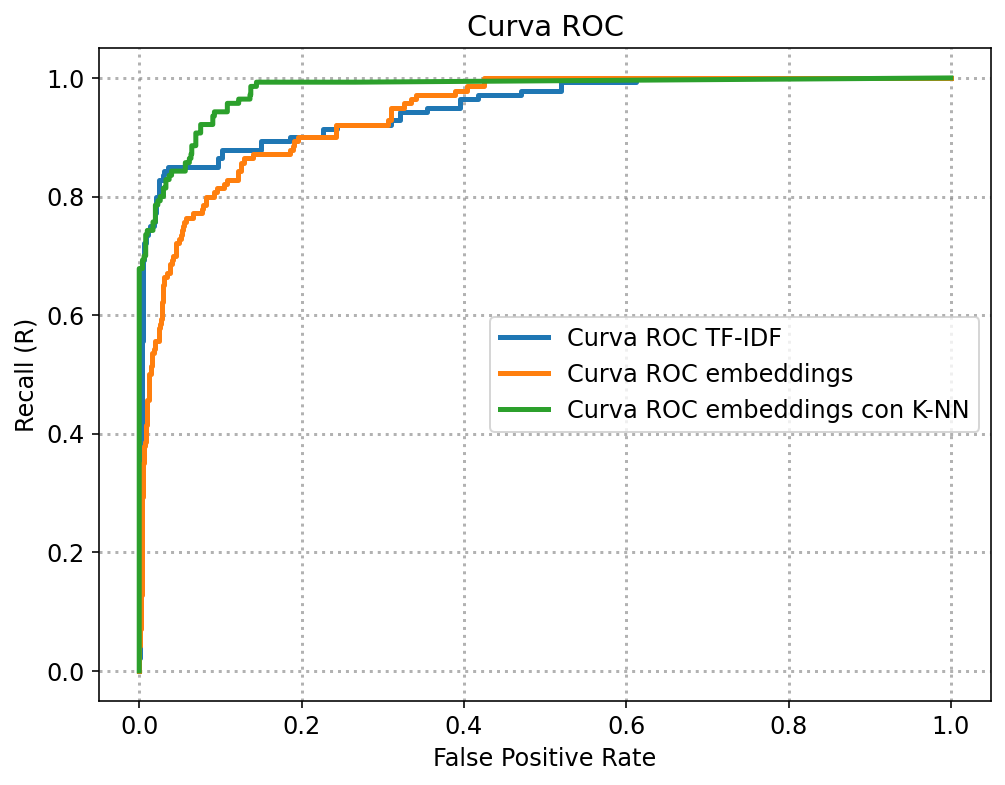

El área bajo la curva ROC de TF-IDF es 0.9507398975526465
El área bajo la curva ROC de embeddings es 0.9395987478656801
El área bajo la curva ROC de embeddings con K-NN es 0.978859561752988


In [ ]:
fpr3, recall3, thresholds = metrics.roc_curve(y_test, knn.predict_proba(W_[idx_test,:])[:,1], pos_label=1) 

fig,ax = plt.subplots()
plt.plot(fpr,recall,lw=2.5,label='Curva ROC TF-IDF')
plt.plot(fpr2,recall2,lw=2.5,label='Curva ROC embeddings')
plt.plot(fpr3,recall3,lw=2.5,label='Curva ROC embeddings con K-NN')
plt.legend(loc=7)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (R)')
plt.title('Curva ROC')
plt.show()

area_roc_tf_idf = metrics.roc_auc_score(y_test, LR_with_CV.predict_proba(C[idx_test,:])[:,1])
area_roc_embbedings = metrics.roc_auc_score(y_test, emb_LR_with_CV.predict_proba(W_test)[:,1])
area_roc_embbedings_knn = metrics.roc_auc_score(y_test, knn.predict_proba(W_[idx_test,:])[:,1])

print(f"El área bajo la curva ROC de TF-IDF es {area_roc_tf_idf}")
print(f"El área bajo la curva ROC de embeddings es {area_roc_embbedings}")
print(f"El área bajo la curva ROC de embeddings con K-NN es {area_roc_embbedings_knn}")

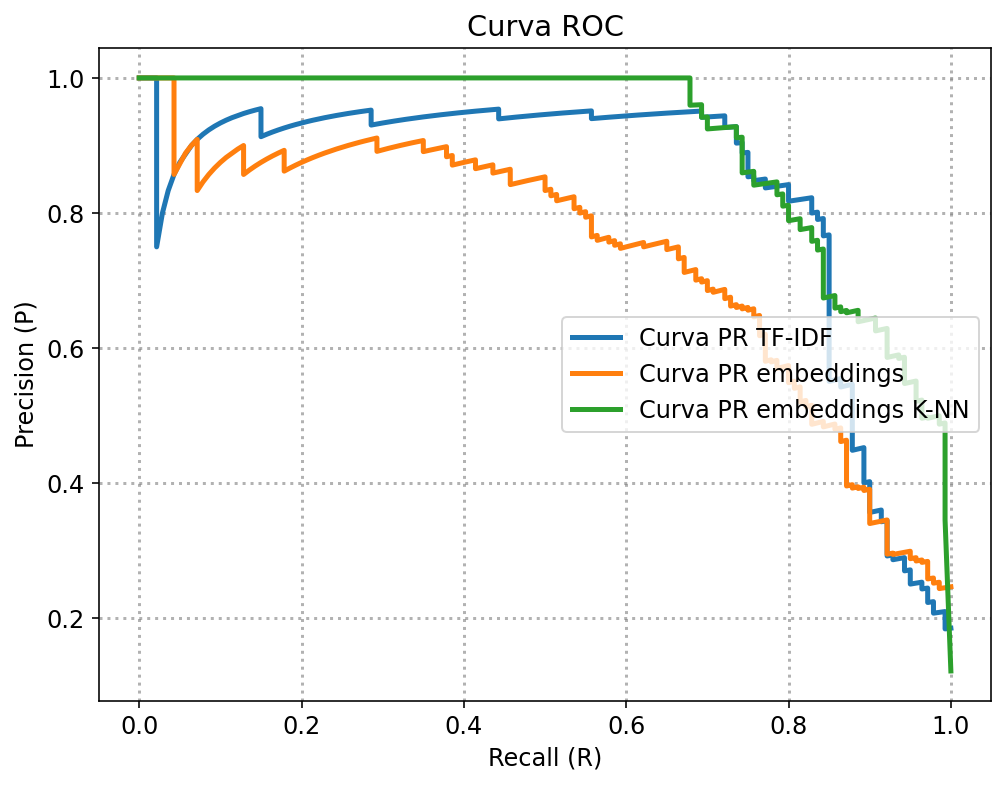

El área bajo la curva PR de TF-IDF es 0.838592303020275
El área bajo la curva PR de embeddings es 0.740158686996372
El área bajo la curva PR de embeddings con k-NN es 0.9105374821316307


In [ ]:
P3, R3, thresholds = metrics.precision_recall_curve(y_test, knn.predict_proba(W_[idx_test,:])[:,1], pos_label=1) 

fig,ax = plt.subplots()
plt.plot(R,P,lw=2.5,label='Curva PR TF-IDF')
plt.plot(R2,P2,lw=2.5,label='Curva PR embeddings')
plt.plot(R3,P3,lw=2.5,label='Curva PR embeddings K-NN')
plt.legend(loc=7)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('Recall (R)')
plt.ylabel('Precision (P)')
plt.title('Curva ROC')
plt.show()

area_pr_tf_idf = metrics.average_precision_score(y_test, LR_with_CV.predict_proba(C[idx_test,:])[:,1])
area_pr_embbedings = metrics.average_precision_score(y_test, emb_LR_with_CV.predict_proba(W_test)[:,1])
area_pr_embbedings_knn = metrics.average_precision_score(y_test, knn.predict_proba(W_[idx_test,:])[:,1], pos_label=1) 

print(f"El área bajo la curva PR de TF-IDF es {area_pr_tf_idf}")
print(f"El área bajo la curva PR de embeddings es {area_pr_embbedings}")
print(f"El área bajo la curva PR de embeddings con k-NN es {area_pr_embbedings_knn}")

## 3.6 Matriz de confusión en clasificación multi-clase

En problemas de clasificación multi-clase, las métricas presentadas pueden promediarse entre las distintas combinaciones de etiquetas. Sin embargo, la perspectiva más completa e informativa de todos los errores del clasificador se a través de la [**matriz de confusión**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

> **Ejercicio**: entrene un RL para clasificar cada oración en tres categorías (negativa/positiva/neutral), utilizando tanto TF-IDF. Recuerde que estas categorías están en el array `labels`. Repita con un K-NN utilizando los embeddings.

In [ ]:
# Separamos train de test
idx_train, idx_test, y_train, y_test = train_test_split(idx_data, labels, test_size=0.2, random_state=0)

rango_C = np.logspace(-3, 3, 20)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^3, a 10^3.
diccionario_parametros = [{'C': rango_C}]   
nfold = 10 # Número de particiones train/validación

""" Ajusto C por validación cruzada
El optimizador por defecto ('lbfgs') no acepta regularización l1. 
Usamos 'liblinear' siguiendo las recomendaciones de la librería.
"""
LR_with_CV  = GridSearchCV(estimator=LR(penalty='l1',max_iter=1e08,solver='liblinear'),
                                  param_grid=diccionario_parametros,cv=nfold)
# Entrenar el modelo
LR_with_CV.fit(C[idx_train,:],y_train)   

print("El mejor parámetro C es {0:.2f}".format(LR_with_CV.best_params_['C']))
                        
# Score de claisficación en train/test
accuracy_train = LR_with_CV.score(C[idx_train,:],y_train)   
accuracy_test = LR_with_CV.score(C[idx_test,:],y_test)  

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train*100, accuracy_test*100))

El mejor parámetro C es 26.37
Accuracy train 99.78%. Accuracy test 91.70%



In [ ]:
# Entrenamiento k-NN con validación de vecinos y ponderación de distancias
K_max = 15
rango_K = np.arange(1, K_max+1)
nfold = 10
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
diccionario_parametros = [{'n_neighbors': rango_K,'weights':['uniform','distance']}]

# Validación cruzada con GridSearchCV
knn = GridSearchCV(estimator=KNeighborsClassifier( ), param_grid=diccionario_parametros,cv=nfold)
# Entrenamiento
knn.fit(W_[idx_train,:],y_train)
# Test
accuracy_train_knn = knn.score(W_[idx_train,:],y_train)
accuracy_test_knn = knn.score(W_[idx_test,:],y_test)

print("El número de vecinos seleccionado es k={0:d}".format(knn.best_params_['n_neighbors']))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de vecinos seleccionado es k=12
Accuracy train 100.00%. Accuracy test 88.90%



> **Ejercicio**: Represente la matriz de confusión de ambos clasificadores. Discuta los resultados

Text(0.5, 1.0, 'Matrix confusión, codificación embeddings')

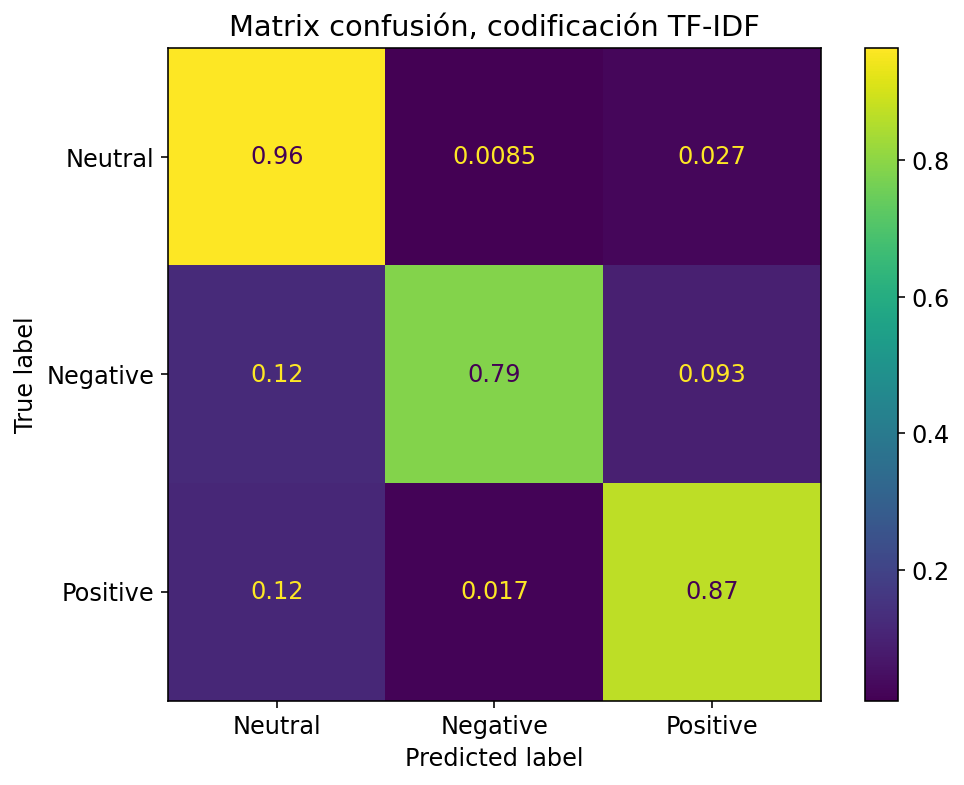

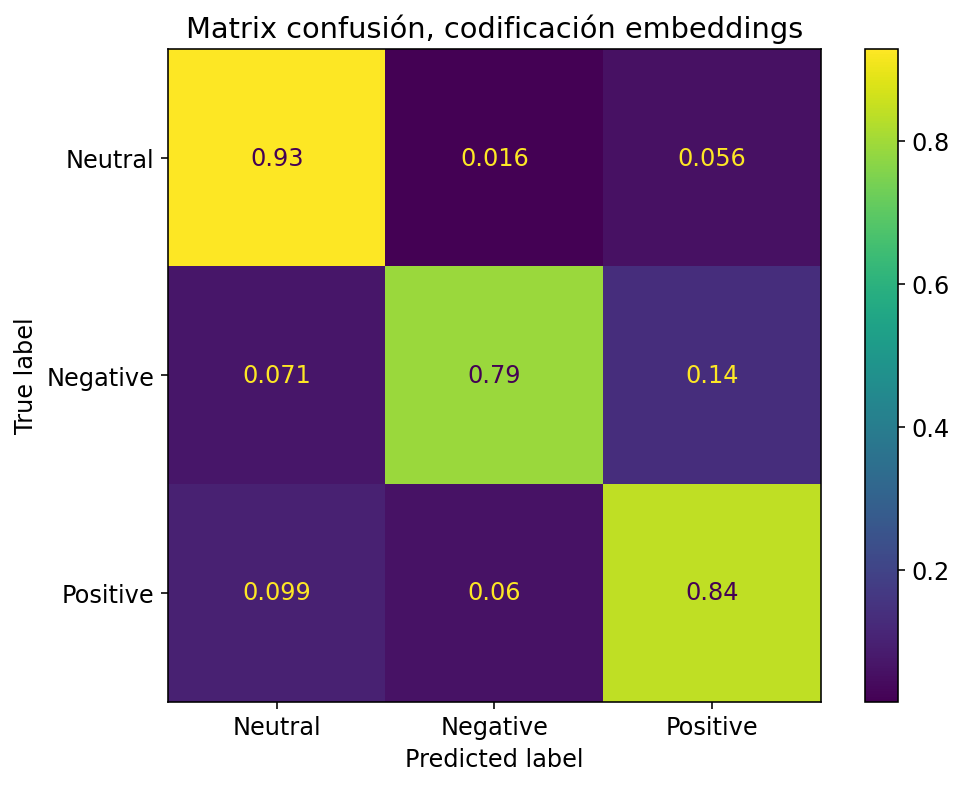

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LR_with_CV, C[idx_test,:], y_test,normalize='true',display_labels=['Neutral','Negative','Positive'])
plt.title('Matrix confusión, codificación TF-IDF')

plot_confusion_matrix(knn, W_[idx_test,:], y_test,normalize='true',display_labels=['Neutral','Negative','Positive'])
plt.title('Matrix confusión, codificación embeddings')

Como vemos, esta división en tres clases hace sufrir en mayor medida al promediado de los embeddings. Una mejor selección de los tokens a promediar mejorará potencialmente los resultados (ver ejercicios adicionales propuestos).

# 4. Ejercicios adicionales:

* Realice el clustering de las reclamaciones en la base de datos *consumer-complaint-database* utilizando algún otro método de clustering
* Implemente el clasificador en la base de datos *Finantial Phrase Bank* utilizando la media de los word embeddings usando únicamente aquellas palabras para las cuales el correspondiente peso del clasificador RL+TF-IDF es mayor que cero.
* Utilice algún algoritmo más avanzado para la clasificación: Random Forest, SVM, etc ...